# IAM - Avaliação 01
**Disciplina:** Introdução ao Aprendizado de Máquina (ENGG67)  
**Professor:** Antônio C. L. Fernandes Jr.  
**Aluno(s):** Giovane Santos de Santana, Heverton Silva dos Reis  
**Data de Entrega:** 06/05/2025

---

## Introdução

<justify>
Pesquisadores da universidade de Wisconsin utilizaram técnicas de processamento de imagem e aprendizado de máquina para aumentar a eficiência de um exame para diagnosticar câncer de mama. Neste trabalho será estudado o conjunto de dados utilizado para esse projeto.

---

### Câncer de mama: um resumo [1]

- **O que é**


O **câncer de mama** é uma doença causada pela multiplicação desordenada de **"células defeituosas"** da mama, que forma um tumor com potencial de **metástase** (espalhamento para outros tecidos do corpo). Existem diversos tipos, com **boa resposta** ao tratamento e **potencial de cura**, especialmente quando **diagnosticado e tratado nos estágios iniciais**.


- **Diagnóstico**


O diagnóstico do câncer de mama envolve: **exame clínico das mamas; exames de imagem (mamografia, ultrassonografia e ressonância magnética; biópsia (método do artigo ao qual o conjunto de dados se baseia).**


- **Tratamento**


O tratamento do câncer pode incluir **cirurgia, radioterapia, quimioterapia, hormonioterapia e terapia-alvo**, dependendo do tipo e estágio do tumor, além das características da paciente.

**Obs:** Apesar de raro, este tipo de câncer também pode afetar indivíduos do **sexo masculino**.

---

### O artigo [2]


Para a pesquisa realizaram aspiração do fluído de um tumor de mama com agulha fina, aplicaram em uma placa de esfragaço e tingiram. A partir disso capturaram uma imagem com uso de uma câmera e um microscópio.<br><br>
<center><img src='https://drive.google.com/uc?export=view&id=1Nr3OxDyj1QRQEO7h6Dz61CaUgfbATeYD' width='70%'> <br> <br>
Bordas do núcleo das células que foram selecionadas.</center><br>
Com a imagem um usuário seleciona as bordas do núcleo das células e com tecnologia de modelo de contorno "snake" as bordas são localizadas. O modelo snake constrói os pontos nas bordas e o centróide do núcleo celular.<br><br>
<center><img src='https://drive.google.com/uc?export=view&id=19-pjczZj6s4fGX14ThWfpg-pm5sWSXtR' width='70%'>  <br>
Bordas do núcleo das células que foram localizadas pelo snake.</center><br>
A partir dos pontos localizados são calculados os atributos do conjunto de dados. No total são dez atributos diferentes raio, perímetro, compacidade, suavidade, concavidade, pontos de concavidade e dimensão fractal que são repetidos três vezes para representar a média o erro padrão e os valores extremos do atributo(média dos três maiores valores) para cada imagem, totalizando trinta atributos no conjunto de dados.
</justify>

---
### Conjunto de Dados: Breast Cancer Wisconsin (Diagnostic)
[Link para o dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

---



<center><img src='https://drive.google.com/uc?export=view&id=1EPixzohGv7b9hcSnOa_v_WavE-s7eCC4'><br>

Antes de começar a análise, é preciso instalar todas as bibliotecas que serão utilizadas:

In [ ]:
pip install ucimlrepo

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

Em seguida, é preciso carregar o dataset, através de importação direta, como indicado pela documentação do repositório:

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_diagnostic.data.features
dt = breast_cancer_wisconsin_diagnostic.data.targets

Por fim, realiza-se a importação das bibliotecas que serão utilizadas ao longo da análise:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### a) O conjunto de dados é univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.

Para avaliar se o conjunto de dados em análise são **univariados** ou **multivariados** é preciso expandir suas variáveis:

In [ ]:
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

Através dessa expansão, percebe-se que o conjunto de dados é **multivariado**, pois entre suas variáveis verificou-se a ocorrência de até **30 atributos preditivos** (identificados no dataset com o papel de `Feature`). Dentre os outros atributos, o atributo que possuiu o papel de **alvo** (`Target`) é o atributo **Diagnosis**.

### b)  Caracterize os dados quanto ao Tipo e Escala.

Para definir o **Tipo** e **Escala** dos dados, pode-se começar verificando os tipos dos **atributos preditivos** através do comando `dtypes` da biblioteca `Pandas`:

In [ ]:
# Ver os tipos de dados diretamente do DataFrame
df.dtypes

,0
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64
symmetry1,float64
fractal_dimension1,float64


Logo, é possível concluir que os **atributos preditivos** são do tipo **numérico contínuo**.

Já para o **atributo alvo**, optou-se por plotar as primeiras linhas do DataFrame através do comando `head()`, que revelou que esse atributo é do tipo **categórico**.

In [ ]:
# Ver os dados das primeiras linhas do DataFrame
dt.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


Quanto a escala, para o atributo alvo, é imedato perceber que se tratam de valores **nominais**. Já para os atributos preditivos, é preciso prestar atenção ao contexto e perceber que eles fazem alusão a atributos geométricos como **área, perímetro, concavidade, simetria**, entre outros. Ou seja, esses atributos carregam significado absoluto, portanto tais atributos são da escala **racional**.

### c) Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados (calcule, para cada atributo, suas estatísticas univariadas pertinentes dentre frequência, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose).

Para verificar se o conjunto precisa de um balancemanto, pode-se começar analisando a distribuição das classes de `Diagnosis`, o **atributo alvo**.

In [ ]:
# Ver distribuição das classes do diagnóstico
dt['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


Tem-se que existem **357 amostras** da classe **B (Benigno)** e **212 amostras** da classe **M (Maligino)**, num **total de 569 amostras**. Ao verificar a proporção das amostras, observou-se que:
<br>
<br>
$Classe B = \frac{357}{569} \times 100 = 62.7 \%$
<br>
<br>
$Classe A = \frac{212}{569} \times 100 = 37.3 \%$
<br>
<br>
Assim, verifica-se que, embora o conjunto **não esteja perfeitamente balanceado**, a diferença entre as classes **não é extremamente alta**. Com isso, considera-se que o dataset possui um **balanceamento razoável** para fins de modelagem, **não sendo estritamente necessário** aplicar técnicas de balanceamento de classes.

Entretanto, como a classe Benigno é mais frequente, é recomendável **avaliar os modelos usando métricas apropriadas**, ao invés de considerar apenas a acurácia, para garantir uma avaliação justa do desempenho em ambas as classes.


Agora, busca-se explorar a **dimensão estatística** do conjunto de dados. Isso pode ser feito plotando uma tabela com todos os valores consolidados:

In [ ]:
# Selecionar apenas os atributos preditivos

# Estatísticas básicas
descricao = pd.DataFrame()
descricao['Média'] = df.mean()
descricao['Mediana'] = df.median()
descricao['Moda'] = df.mode().iloc[0]
descricao['Desvio Padrão'] = df.std()
descricao['Q1 (25%)'] = df.quantile(0.25)
descricao['Q3 (75%)'] = df.quantile(0.75)
descricao['Obliquidade'] = df.skew()
descricao['Curtose'] = df.kurt()

# Exibir as variáveis
descricao.head(30)

,Média,Mediana,Moda,Desvio Padrão,Q1 (25%),Q3 (75%),Obliquidade,Curtose
radius1,14.127292,13.370000,12.340000,3.524049,11.700000,15.780000,0.942380,0.845522
texture1,19.289649,18.840000,14.930000,4.301036,16.170000,21.800000,0.650450,0.758319
perimeter1,91.969033,86.240000,82.610000,24.298981,75.170000,104.100000,0.990650,0.972214
area1,654.889104,551.100000,512.200000,351.914129,420.300000,782.700000,1.645732,3.652303
smoothness1,0.096360,0.095870,0.100700,0.014064,0.086370,0.105300,0.456324,0.855975
compactness1,0.104341,0.092630,0.114700,0.052813,0.064920,0.130400,1.190123,1.650130
concavity1,0.088799,0.061540,0.000000,0.079720,0.029560,0.130700,1.401180,1.998638
concave_points1,0.048919,0.033500,0.000000,0.038803,0.020310,0.074000,1.171180,1.066556
symmetry1,0.181162,0.179200,0.160100,0.027414,0.161900,0.195700,0.725609,1.287933
fractal_dimension1,0.062798,0.061540,0.056670,0.007060,0.057700,0.066120,1.304489,3.005892


Alguns aspectos relacionados na tabela resultado serão melhor expostos em seções futuras. Todavia, de início, ao se chamar atenção para os valores de **obliquidade** e **curtose**, percebe-se que os atributos descritivos que representam **dimensões físicas** muito provavelmente exibem um índice alto de **outliers**, algo que deve ser verificado com atenção.

### d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído

Uma estatégia que pode ser utilizada para avaliar o conjunto de dados quanto à sua **incompletude** é verificar a existência de **valores nulos** entre os atributos. Isso pode ser feito atraves do comando `isnull()` do pandas. Ao se fazer um **somatório desses valores**, se o valor for `0` para cada uma das colunas, então **não existe incompletude** para esses atributos. Começa-se com os atributos preditivos:


In [ ]:
# Verificar valores nulos em cada coluna
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


O mesmo pode ser feito para o atributo alvo:

In [ ]:
# Verificar valores nulos em cada coluna
dt.isnull().sum()

,0
Diagnosis,0


Assim, pode-se concluir que **não existem incompletudes** entre os valores do dataset.

Já para verificar o conjunto em relação às **incosistências**, pode-se partir da análise já realizada anteriormente sobre os **Tipo** e a **Escala** dos dados. Como visto, os atributos preditivos representam valores **numéricos contínuos e absolutos**, mais especificamente, tratam de **medidas físicas** as quais **não se aplicam valores negativos** (a exemplo de área, raio, concavidade, etc.). Logo, assim como na abordagem anterior, pode-se verificar a existência desses valores e calcular seu somatório. Novamente, busca-se que o valor seja `0`, para que não hajam incosistências:

In [ ]:
# Verificar valores negativos dos atributos preditivos
(df < 0).sum()


,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


Então, tem-se que os valores dos atributos preditivos **são consistentes.**

Quanto a redundânicia, uma forma de avaliar isso é possível aplicar uma **matriz de correlação**, e verificar os atributos que possuem uma correlação **próxima de 1**. Essa característica estatística pode indicar atributos que trazem informações semelhantes, e, que um deles poderia ser removido, a depender da análise.

In [ ]:
# Matriz de correlação
cor = df.corr().abs()

# Verificar redundância: pares com correlação alta (> 0.9)
redundantes = cor.where((cor > 0.9) & (cor < 1.0))
redundantes.dropna(how='all', axis=0).dropna(how='all', axis=1)

,radius1,texture1,perimeter1,area1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,texture3,perimeter3,area3,concave_points3
radius1,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN
texture1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN
perimeter1,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN
area1,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN
concavity1,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave_points1,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155
radius2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,0.951830,NaN,NaN,NaN,NaN,NaN
perimeter2,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,NaN,0.937655,NaN,NaN,NaN,NaN,NaN
area2,NaN,NaN,NaN,NaN,NaN,NaN,0.951830,0.937655,NaN,NaN,NaN,NaN,NaN,NaN
radius3,0.969539,NaN,0.969476,0.962746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993708,0.984015,NaN


Ao fazer isso com os atributos preditivos, como esperado, verificou-se que existem correlações altas entre atributos físicos, como **área, perímetro e raio**, por exemplo. Logo, alguns desses valores poderiam ser desprezados na análise de alguns modelos, como os de regressão linear por exemplo.

### e) Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.

In [ ]:
# Calcular matriz de covariância
matriz_cov = df.cov()
matriz_cov.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,12.42,4.91,85.45,1224.48,0.01,0.09,0.19,0.11,0.01,-0.01,...,16.51,6.43,114.29,1888.23,0.01,0.23,0.39,0.17,0.04,0.00
texture1,4.91,18.50,34.44,485.99,-0.00,0.05,0.10,0.05,0.01,-0.00,...,7.33,24.11,51.75,841.28,0.01,0.19,0.27,0.08,0.03,0.01
perimeter1,85.45,34.44,590.44,8435.77,0.07,0.71,1.39,0.80,0.12,-0.04,...,113.86,45.26,792.33,13026.15,0.08,1.74,2.86,1.23,0.28,0.02
area1,1224.48,485.99,8435.77,123843.55,0.88,9.26,19.24,11.24,1.46,-0.70,...,1637.52,621.82,11341.79,192192.56,0.99,21.62,37.63,16.70,3.13,0.02
smoothness1,0.01,-0.00,0.07,0.88,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.11,1.66,0.00,0.00,0.00,0.00,0.00,0.00
compactness1,0.09,0.05,0.71,9.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.14,0.08,1.05,15.32,0.00,0.01,0.01,0.00,0.00,0.00
concavity1,0.19,0.10,1.39,19.24,0.00,0.00,0.01,0.00,0.00,0.00,...,0.27,0.15,1.95,30.68,0.00,0.01,0.01,0.00,0.00,0.00
concave_points1,0.11,0.05,0.80,11.24,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.07,1.12,17.89,0.00,0.00,0.01,0.00,0.00,0.00
symmetry1,0.01,0.01,0.12,1.46,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.20,2.77,0.00,0.00,0.00,0.00,0.00,0.00
fractal_dimension1,-0.01,-0.00,-0.04,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.01,-0.00,-0.05,-0.93,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Calcular matriz de correlação
matriz_cor = df.corr()
matriz_cor.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture1,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter1,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area1,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness1,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness1,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity1,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points1,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry1,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension1,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


Como é possível perceber, como os dados são volumosos, fica difícil obter respostas através dessas duas medidas estatíticas apenas visualizando os resultados brutos das operações de **covariância** e **correlação**. Assim, faz-se necessária uma **abordagem gráfica**. Uma opção é utilizar os valores da matriz de correlação (a normalização da covariância) para gerar um **mapa de calor**:

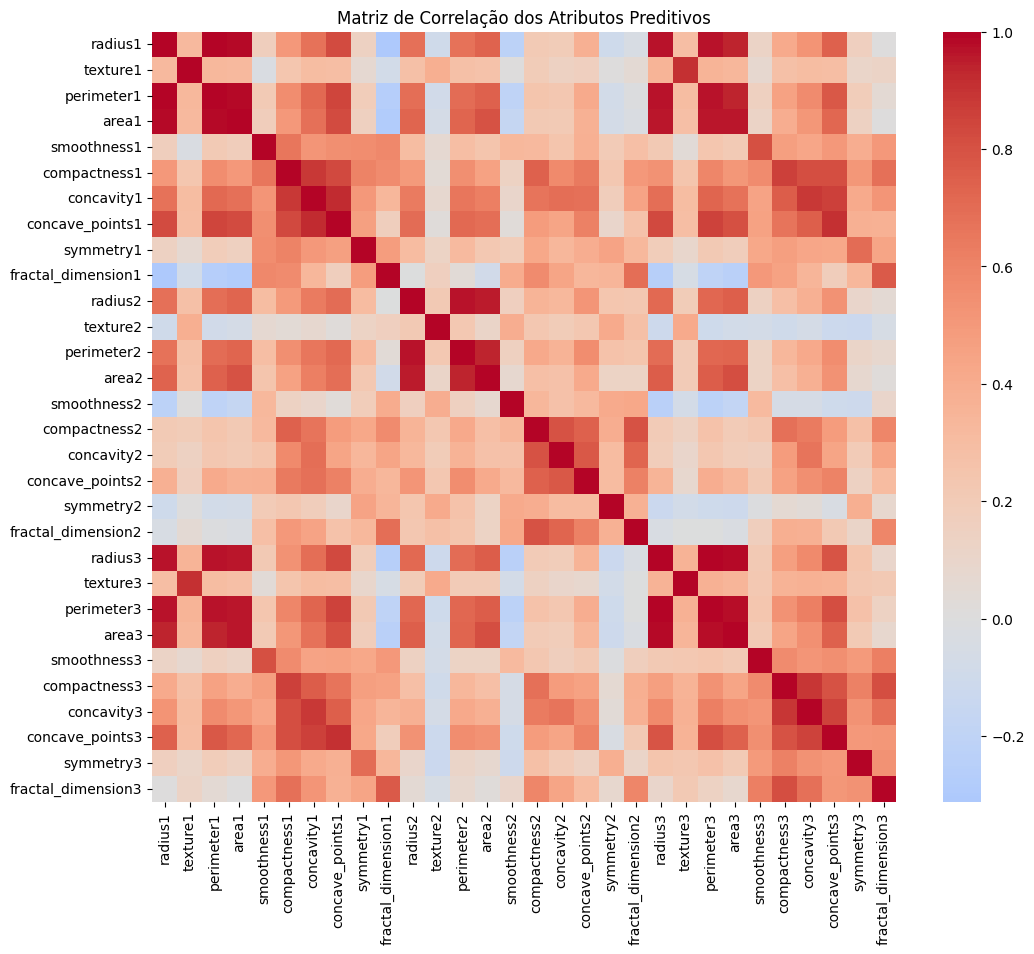

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(matriz_cor, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlação dos Atributos Preditivos")
plt.show()

Como já foi percebido anteriormente nesta análise, os valores de dimensões físicas como **área, perímetro e raio** possuem alta correlação entre si, o que é esperado, visto que qualquer mudança em uma dessas medidas afeta as outras. Logo, a depender da análise, alguns desses parâmetros poderiam ser removidos. Já outros como **suavidade, simetria e dimensão fractal** possuem menos correlação com os atributos físicos, mas ainda assim, mais umas com as outras, o que indica que talvez possam ser avaliadas em separado.

### f) Trace boxplots dos atributos preditivos e identifique a presença ou não de outliers.

Todos os atributos possuem outliers exceto os valores extremos do atributo **Pontos Côncavos**

In [ ]:
dft = pd.DataFrame(df)
dft["Diagnosis"] = dt

df_b = dft.query("Diagnosis == 'B'")
df_b = df_b.drop("Diagnosis", axis=1)
df_b = df_b.reset_index()

descricao_b = pd.DataFrame()
descricao_b['Q1 (25%)'] = df_b.quantile(0.25)
descricao_b['Mediana'] = df_b.median()
descricao_b['Q3 (75%)'] = df_b.quantile(0.75)
descricao_b['Obliquidade'] = df_b.skew()
descricao_b['Curtose'] = df_b.kurt()
descricao_b['Moda'] = df_b.mode().mean()
descricao_b['Média'] = df_b.mean()
descricao_b = descricao_b.T

df_m = dft.query("Diagnosis == 'M'")
df_m = df_m.drop("Diagnosis", axis=1)
df_m = df_m.reset_index()

descricao_m = pd.DataFrame()
descricao_m['Q1 (25%)'] = df_m.quantile(0.25)
descricao_m['Mediana'] = df_m.median()
descricao_m['Q3 (75%)'] = df_m.quantile(0.75)
descricao_m['Obliquidade'] = df_m.skew()
descricao_m['Curtose'] = df_m.kurt()
descricao_m['Moda'] = df_m.mode().mean()
descricao_m['Média'] = df_m.mean()
descricao_m = descricao_m.T

pedaco_descricao = pd.DataFrame([descricao['Q1 (25%)'],
                                 descricao.Mediana,
                                 descricao['Q3 (75%)'],
                                 descricao.Obliquidade,
                                 descricao.Curtose,
                                 descricao.Moda,
                                 descricao.Média])

<Axes: xlabel='RaioErroPadrao'>

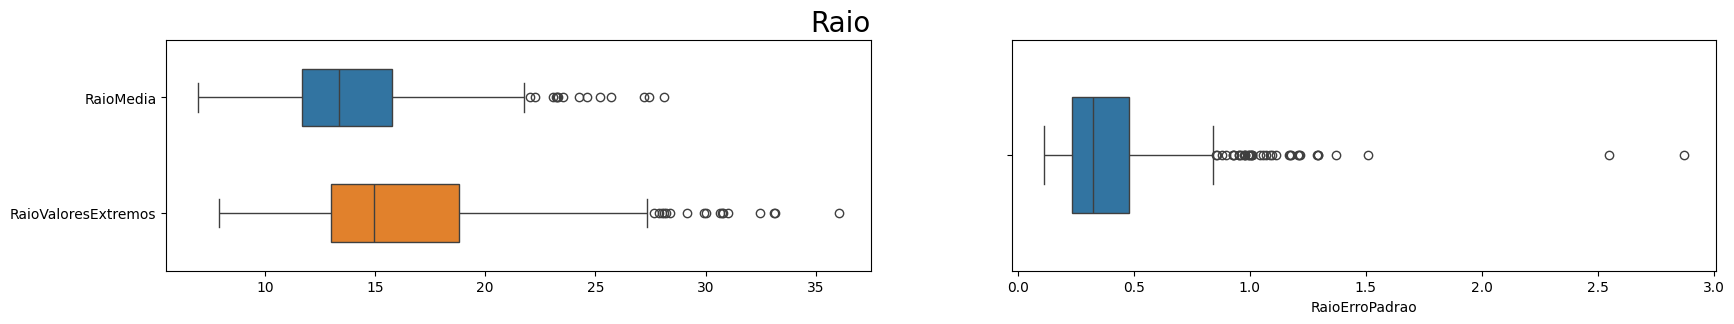

In [ ]:
raio_df = pd.DataFrame()
raio_df["RaioMedia"] = dft.radius1
raio_df["RaioErroPadrao"] = dft.radius2
raio_df["RaioValoresExtremos"] = dft.radius3
raio_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_1 = sns.boxplot(data = [raio_df.RaioMedia,raio_df.RaioValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_1.set_title("Raio",fontsize = 20,loc="right")
boxplot_1 = sns.boxplot(data = raio_df.RaioErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_1

In [ ]:
tabela_raio = pd.DataFrame([pedaco_descricao.radius1,pedaco_descricao.radius3,pedaco_descricao.radius2])
tabela_raio_m = pd.DataFrame([descricao_m.radius1,descricao_m.radius3,descricao_m.radius2])
tabela_raio_b = pd.DataFrame([descricao_b.radius1,descricao_b.radius3,descricao_b.radius2])

tabela_raio.rename({"radius1": "RaioMedia","radius2": "RaioErroPadrao","radius3": "RaioValoresExtremos"},axis=0,inplace=True)
tabela_raio_m.rename({"radius1": "RaioMedia","radius2": "RaioErroPadrao","radius3": "RaioValoresExtremos"},axis=0,inplace=True)
tabela_raio_b.rename({"radius1": "RaioMedia","radius2": "RaioErroPadrao","radius3": "RaioValoresExtremos"},axis=0,inplace=True)

tabela_raio

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,11.7000,13.3700,15.7800,0.942380,0.845522,12.3400,14.127292
RaioValoresExtremos,13.0100,14.9700,18.7900,1.103115,0.944090,12.3600,16.269190
RaioErroPadrao,0.2324,0.3242,0.4789,3.088612,17.686726,0.2204,0.405172


#### Outliers do raio

Existem muitos outliers no conjunto de dados, o que indica que possivelmente esses dados possuam ruído.

#### Distribuição do raio
<justify>
Todos os atributos do raio indicam uma distribuição relativamente assimétrica à direita, o que é possível de se perceber devido a distância da mediana em relação ao primeiro quartil.
</justify>

#### Dispersão do raio
<justify>
Os valores extremos estão relativamente dispersos e o erro padrão está relativamente concentrado.
</justify>


<Axes: xlabel='TexturaErroPadrao'>

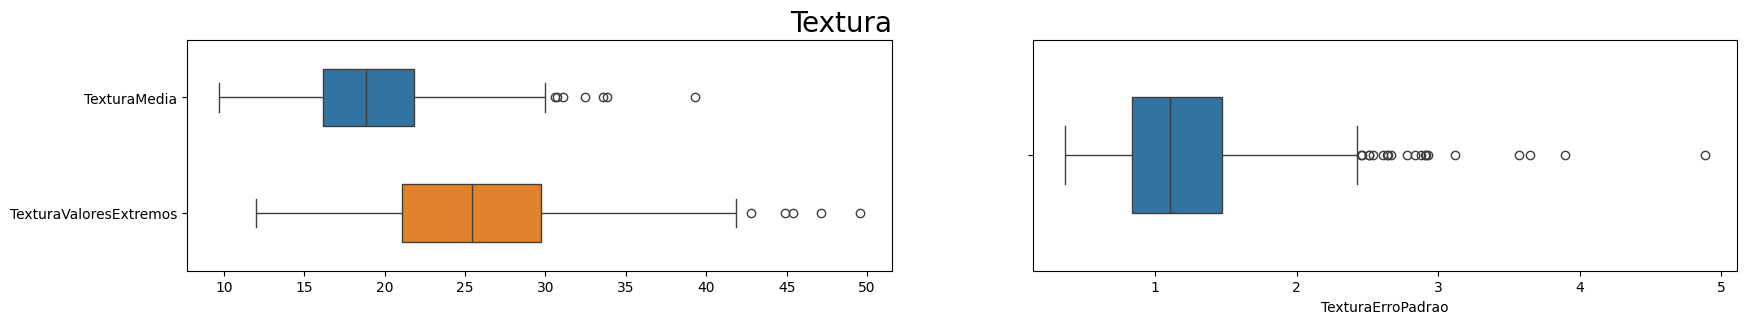

In [ ]:
textura_df = pd.DataFrame()
textura_df["TexturaMedia"] = dft.texture1
textura_df["TexturaErroPadrao"] = dft.texture2
textura_df["TexturaValoresExtremos"] = dft.texture3
textura_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_2 = sns.boxplot(data = [textura_df.TexturaMedia, textura_df.TexturaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_2.set_title("Textura",fontsize = 20,loc="right")
boxplot_2 = sns.boxplot(data = textura_df.TexturaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_2

In [ ]:
tabela_textura = pd.DataFrame([pedaco_descricao.texture1,pedaco_descricao.texture3,pedaco_descricao.texture2])
tabela_textura_m = pd.DataFrame([descricao_m.texture1,descricao_m.texture3,descricao_m.texture2])
tabela_textura_b = pd.DataFrame([descricao_b.texture1,descricao_b.texture3,descricao_b.texture2])

tabela_textura.rename({"texture1": "TexturaMedia","texture2": "TexturaErroPadrao","texture3": "TexturaValoresExtremos"},axis=0,inplace=True)
tabela_textura_m.rename({"texture1": "TexturaMedia","texture2": "TexturaErroPadrao","texture3": "TexturaValoresExtremos"},axis=0,inplace=True)
tabela_textura_b.rename({"texture1": "TexturaMedia","texture2": "TexturaErroPadrao","texture3": "TexturaValoresExtremos"},axis=0,inplace=True)

tabela_textura

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,16.1700,18.840,21.800,0.650450,0.758319,14.9300,19.289649
TexturaValoresExtremos,21.0800,25.410,29.720,0.498321,0.224302,17.7000,25.677223
TexturaErroPadrao,0.8339,1.108,1.474,1.646444,5.349169,0.8561,1.216853


#### Outliers da textura

A presença de outliers é pouco significativa.

#### Distribuição da textura

Os valores extremos e a média indicam uma distribuição simétrica e o erro padrão apresenta uma leve assimetria à direita.

#### Dispersão da textura
Os valores extremos apresentam uma dispersão maior que média da textura.


<Axes: xlabel='PerimetroErroPadrao'>

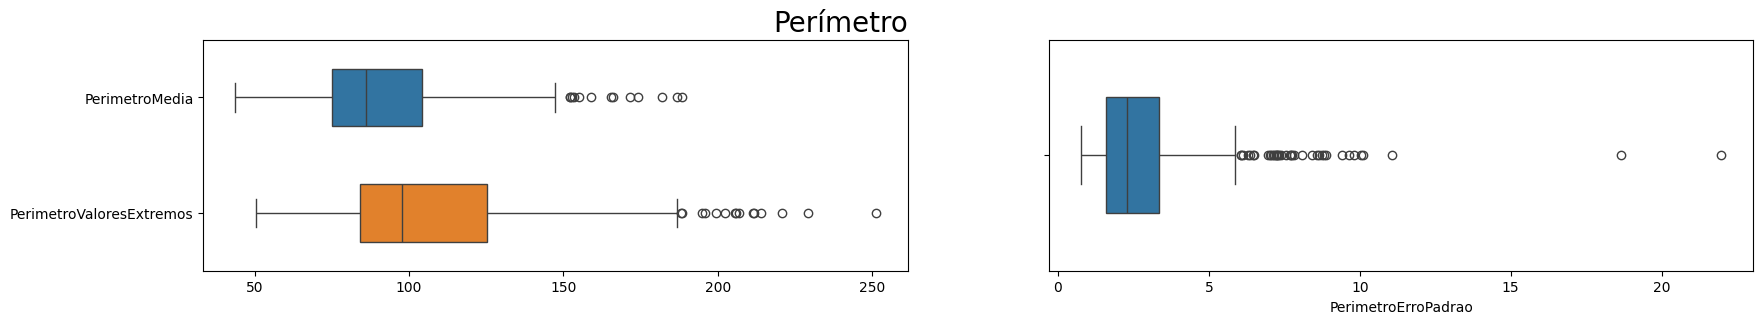

In [ ]:
perimetro_df = pd.DataFrame()
perimetro_df["PerimetroMedia"] = dft.perimeter1
perimetro_df["PerimetroErroPadrao"] = dft.perimeter2
perimetro_df["PerimetroValoresExtremos"] = dft.perimeter3
perimetro_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_3 = sns.boxplot(data = [perimetro_df.PerimetroMedia,perimetro_df.PerimetroValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_3.set_title("Perímetro",fontsize = 20,loc="right")
boxplot_3 = sns.boxplot(data = perimetro_df.PerimetroErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_3

In [ ]:
tabela_perimetro = pd.DataFrame([pedaco_descricao.perimeter1,pedaco_descricao.perimeter3,pedaco_descricao.perimeter2])
tabela_perimetro_m = pd.DataFrame([descricao_m.perimeter1,descricao_m.perimeter3,descricao_m.perimeter2])
tabela_perimetro_b = pd.DataFrame([descricao_b.perimeter1,descricao_b.perimeter3,descricao_b.perimeter2])

tabela_perimetro.rename({"perimeter1": "PerimetroMedia","perimeter2": "PerimetroErroPadrao","perimeter3": "PerimetroValoresExtremos"},axis=0,inplace=True)
tabela_perimetro_m.rename({"perimeter1": "PerimetroMedia","perimeter2": "PerimetroErroPadrao","perimeter3": "PerimetroValoresExtremos"},axis=0,inplace=True)
tabela_perimetro_b.rename({"perimeter1": "PerimetroMedia","perimeter2": "PerimetroErroPadrao","perimeter3": "PerimetroValoresExtremos"},axis=0,inplace=True)

tabela_perimetro

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,75.170,86.240,104.100,0.990650,0.972214,82.610,91.969033
PerimetroValoresExtremos,84.110,97.660,125.400,1.128164,1.070150,101.700,107.261213
PerimetroErroPadrao,1.606,2.287,3.357,3.443615,21.401905,1.778,2.866059


#### Outliers do perímetro

A presença de outliers é significativa possivelmente possuindo ruído.

#### Distribuição do perímetro

Todos os atributos indicam uma distribuição relativamente assimétrica à direita.

#### Dispersão do perímetro

Os valores extremos apresentam uma dispersão maior que média do atributo e o erro padrão está relativamente concentrado.

<Axes: xlabel='AreaErroPadrao'>

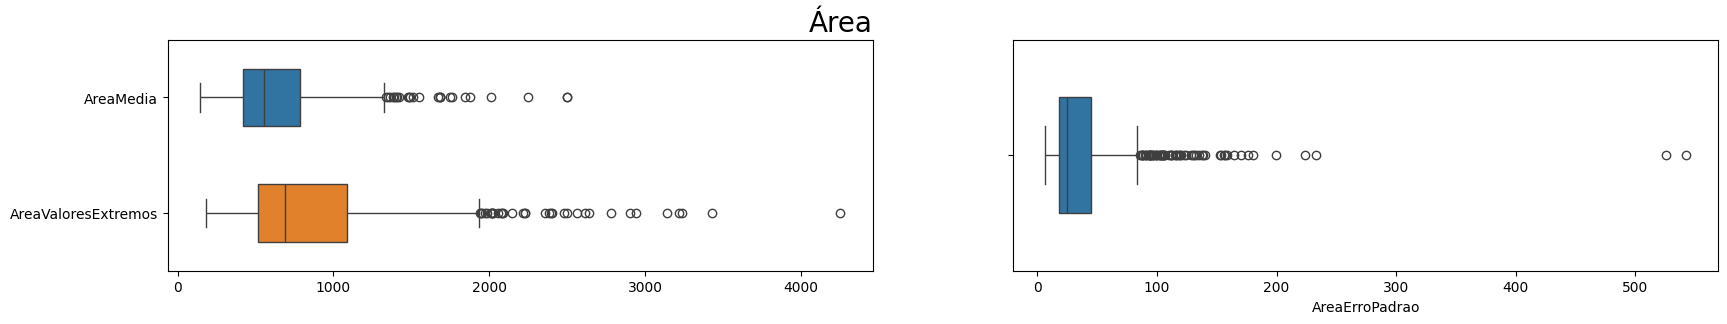

In [ ]:
area_df = pd.DataFrame()
area_df["AreaMedia"] = dft.area1
area_df["AreaErroPadrao"] = dft.area2
area_df["AreaValoresExtremos"] = dft.area3
area_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_4 = sns.boxplot(data = [area_df.AreaMedia,area_df.AreaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_4.set_title("Área",fontsize = 20,loc="right")
boxplot_4 = sns.boxplot(data = area_df.AreaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_4

In [ ]:
tabela_area = pd.DataFrame([pedaco_descricao.area1,pedaco_descricao.area3,pedaco_descricao.area2])
tabela_area_m = pd.DataFrame([descricao_m.area1,descricao_m.area3,descricao_m.area2])
tabela_area_b = pd.DataFrame([descricao_b.area1,descricao_b.area3,descricao_b.area2])

tabela_area.rename({"area1": "AreaMedia","area2": "AreaErroPadrao","area3": "AreaValoresExtremos"},axis=0,inplace=True)
tabela_area_m.rename({"area1": "AreaMedia","area2": "AreaErroPadrao","area3": "AreaValoresExtremos"},axis=0,inplace=True)
tabela_area_b.rename({"area1": "AreaMedia","area2": "AreaErroPadrao","area3": "AreaValoresExtremos"},axis=0,inplace=True)

tabela_area

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,420.30,551.10,782.70,1.645732,3.652303,512.20,654.889104
AreaValoresExtremos,515.30,686.50,1084.00,1.859373,4.396395,284.40,880.583128
AreaErroPadrao,17.85,24.53,45.19,5.447186,49.209077,16.64,40.337079


#### Outliers da área

A presença de outliers é a maior de todo o dataset, sendo o atributo mais comprometido, com maior potencial de ter ruído.

#### Distribuição da área

A média da área indica uma distribuição relativamente assimétrica à direita, os valores extremos e o erro padrão indicam uma grande assimetria à direita.

#### Dispersão da área

Os valores extremos estão relativamente dispersos e o erro padrão está relativamente concentrado.  

<Axes: xlabel='SuavidadeErroPadrao'>

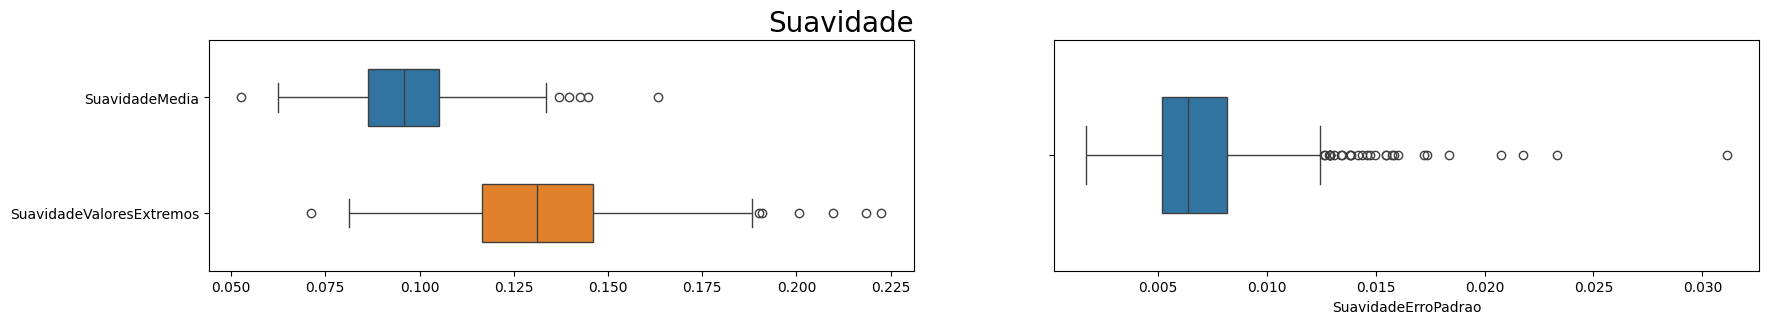

In [ ]:
suavidade_df = pd.DataFrame()
suavidade_df["SuavidadeMedia"] = dft.smoothness1
suavidade_df["SuavidadeErroPadrao"] = dft.smoothness2
suavidade_df["SuavidadeValoresExtremos"] = dft.smoothness3
suavidade_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_5 = sns.boxplot(data = [suavidade_df.SuavidadeMedia,suavidade_df.SuavidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_5.set_title("Suavidade",fontsize = 20,loc="right")
boxplot_5 = sns.boxplot(data = suavidade_df.SuavidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_5

In [ ]:
tabela_suavidade = pd.DataFrame([pedaco_descricao.smoothness1,pedaco_descricao.smoothness3,pedaco_descricao.smoothness2])
tabela_suavidade_m = pd.DataFrame([descricao_m.smoothness1,descricao_m.smoothness3,descricao_m.smoothness2])
tabela_suavidade_b = pd.DataFrame([descricao_b.smoothness1,descricao_b.smoothness3,descricao_b.smoothness2])

tabela_suavidade.rename({"smoothness1": "SuavidadeMedia","smoothness2": "SuavidadeErroPadrao","smoothness3": "SuavidadeValoresExtremos"},axis=0,inplace=True)
tabela_suavidade_m.rename({"smoothness1": "SuavidadeMedia","smoothness2": "SuavidadeErroPadrao","smoothness3": "SuavidadeValoresExtremos"},axis=0,inplace=True)
tabela_suavidade_b.rename({"smoothness1": "SuavidadeMedia","smoothness2": "SuavidadeErroPadrao","smoothness3": "SuavidadeValoresExtremos"},axis=0,inplace=True)

tabela_suavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.086370,0.09587,0.105300,0.456324,0.855975,0.10070,0.096360
SuavidadeValoresExtremos,0.116600,0.13130,0.146000,0.415426,0.517825,0.12160,0.132369
SuavidadeErroPadrao,0.005169,0.00638,0.008146,2.314450,10.469840,0.00508,0.007041


#### Outliers da suavidade

A presença de outliers é pouco significativa.

#### Distribuição da suavidade

Os valores extremos e a média do atributo indicam uma distribuição simétrica e o erro padrão indica uma leve assimetria à direita.

#### Dispersão da suavidade

Os valores extremos estão um pouco mais dispersos que o erro padrão e a média do atributo.

<Axes: xlabel='CompacidadeErroPadrao'>

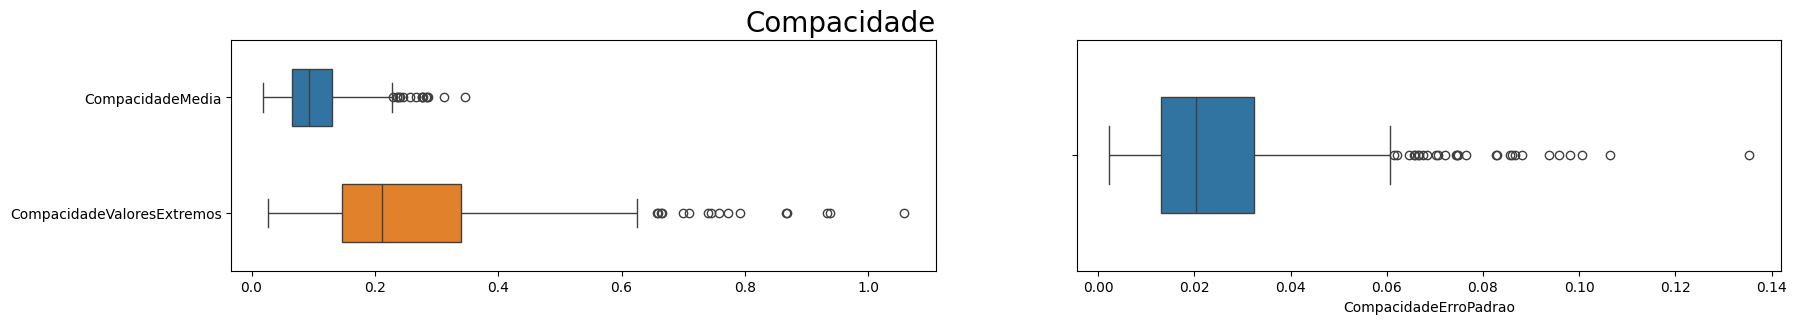

In [ ]:
compacidade_df = pd.DataFrame()
compacidade_df["CompacidadeMedia"] = dft.compactness1
compacidade_df["CompacidadeErroPadrao"] = dft.compactness2
compacidade_df["CompacidadeValoresExtremos"] = dft.compactness3
compacidade_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_6 = sns.boxplot(data = [compacidade_df.CompacidadeMedia,compacidade_df.CompacidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_6.set_title("Compacidade",fontsize = 20,loc="right")
boxplot_6 = sns.boxplot(data = compacidade_df.CompacidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_6

In [ ]:
tabela_compacidade = pd.DataFrame([pedaco_descricao.concavity1,pedaco_descricao.concavity3,pedaco_descricao.concavity2])
tabela_compacidade_m = pd.DataFrame([descricao_m.concavity1,descricao_m.concavity3,descricao_m.concavity2])
tabela_compacidade_b = pd.DataFrame([descricao_b.concavity1,descricao_b.concavity3,descricao_b.concavity2])

tabela_compacidade.rename({"concavity1": "CompacidadeMedia","concavity2": "CompacidadeErroPadrao","concavity3": "CompacidadeValoresExtremos"},axis=0,inplace=True)
tabela_compacidade_m.rename({"concavity1": "CompacidadeMedia","concavity2": "CompacidadeErroPadrao","concavity3": "CompacidadeValoresExtremos"},axis=0,inplace=True)
tabela_compacidade_b.rename({"concavity1": "CompacidadeMedia","concavity2": "CompacidadeErroPadrao","concavity3": "CompacidadeValoresExtremos"},axis=0,inplace=True)

tabela_compacidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
CompacidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
CompacidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### Outliers da compacidade

A presença de outliers é muito significativa.

#### Distribuição da compacidade

Todos os atributos indicam uma leve assimetria à direita.

#### Dispersão da compacidade

A média está concentrada e os valores extremos estão dispersos.

<Axes: xlabel='ConcavidadeErroPadrao'>

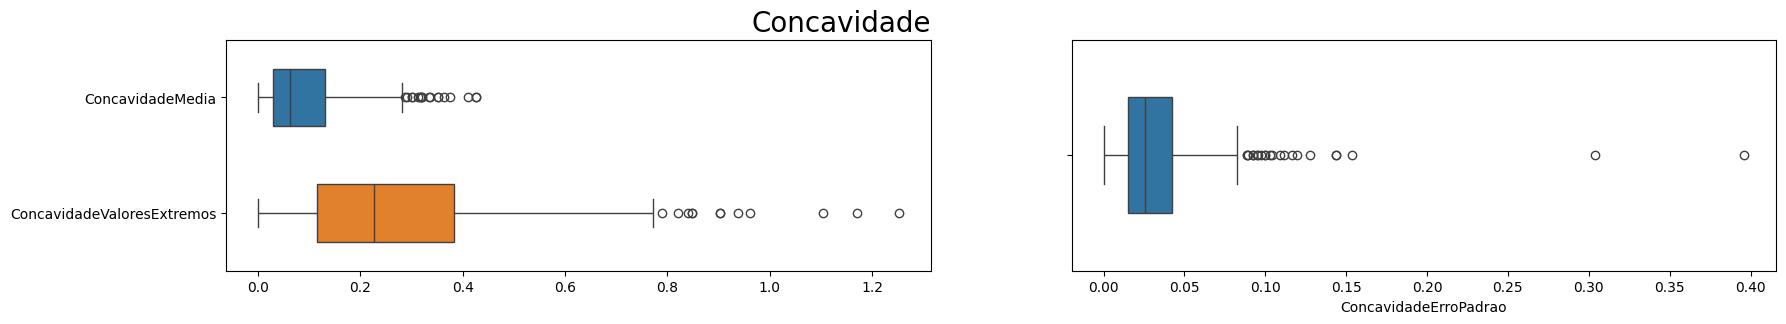

In [ ]:
concavidade_df = pd.DataFrame()
concavidade_df["ConcavidadeMedia"] = dft.concavity1
concavidade_df["ConcavidadeErroPadrao"] = dft.concavity2
concavidade_df["ConcavidadeValoresExtremos"] = dft.concavity3
concavidade_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_7 = sns.boxplot(data = [concavidade_df.ConcavidadeMedia,concavidade_df.ConcavidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_7.set_title("Concavidade",fontsize = 20,loc="right")
boxplot_7 = sns.boxplot(data = concavidade_df.ConcavidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_7

In [ ]:
tabela_concavidade = pd.DataFrame([pedaco_descricao.concavity1,pedaco_descricao.concavity3,pedaco_descricao.concavity2])
tabela_concavidade_m = pd.DataFrame([descricao_m.concavity1,descricao_m.concavity3,descricao_m.concavity2])
tabela_concavidade_b = pd.DataFrame([descricao_b.concavity1,descricao_b.concavity3,descricao_b.concavity2])

tabela_concavidade.rename({"concavity1": "ConcavidadeMedia","concavity2": "ConcavidadeErroPadrao","concavity3": "ConcavidadeValoresExtremos"},axis=0,inplace=True)
tabela_concavidade_m.rename({"concavity1": "ConcavidadeMedia","concavity2": "ConcavidadeErroPadrao","concavity3": "ConcavidadeValoresExtremos"},axis=0,inplace=True)
tabela_concavidade_b.rename({"concavity1": "ConcavidadeMedia","concavity2": "ConcavidadeErroPadrao","concavity3": "ConcavidadeValoresExtremos"},axis=0,inplace=True)

tabela_concavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
ConcavidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
ConcavidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### Outliers da concavidade

A presença de outliers é pouco significativa.

#### Distribuição da convavidade

Todos os atributos indicam uma assimetria à direita, sendo menor nos valores extremos e maior na média.

#### Dispersão da concavidade

A média e o erro padrão do atributo estão concentrados e os valores extremos estão dispersos.

<Axes: xlabel='PontosConcavosErroPadrao'>

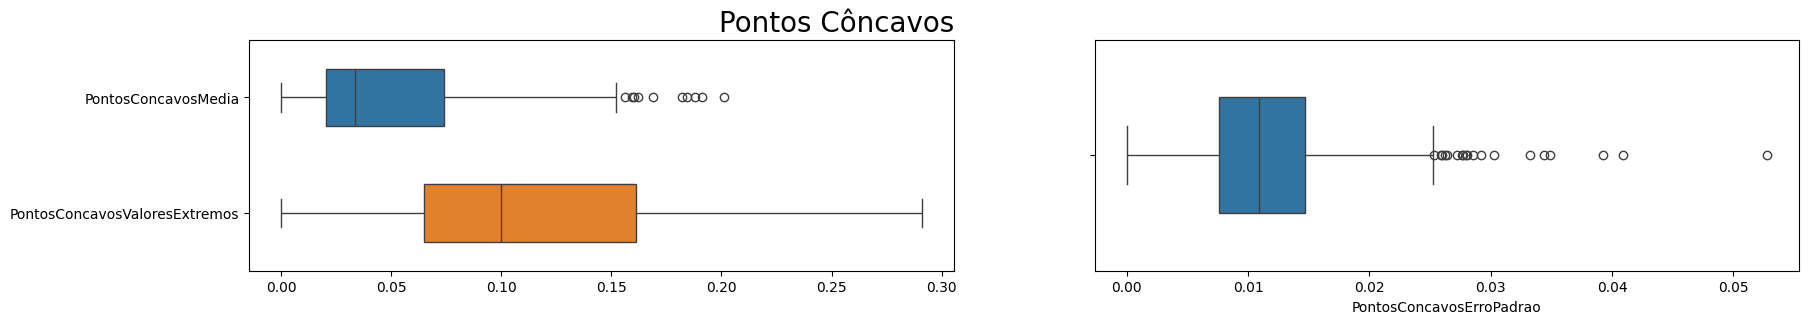

In [ ]:
pontos_concavos_df = pd.DataFrame()
pontos_concavos_df["PontosConcavosMedia"] = dft.concave_points1
pontos_concavos_df["PontosConcavosErroPadrao"] = dft.concave_points2
pontos_concavos_df["PontosConcavosValoresExtremos"] = dft.concave_points3
pontos_concavos_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_8 = sns.boxplot(data = [pontos_concavos_df.PontosConcavosMedia,pontos_concavos_df.PontosConcavosValoresExtremos], orient = "h", width=0.5,ax = eixo[0])
boxplot_8.set_title("Pontos Côncavos",fontsize = 20,loc="right")
boxplot_8 = sns.boxplot(data = pontos_concavos_df.PontosConcavosErroPadrao, orient = "h", width=0.5,ax = eixo[1])

boxplot_8

In [ ]:
tabela_ponto_concavos = pd.DataFrame([pedaco_descricao.concave_points1,pedaco_descricao.concave_points3,pedaco_descricao.concave_points2])
tabela_ponto_concavos_m = pd.DataFrame([descricao_m.concave_points1,descricao_m.concave_points3,descricao_m.concave_points2])
tabela_ponto_concavos_b = pd.DataFrame([descricao_b.concave_points1,descricao_b.concave_points3,descricao_b.concave_points2])

tabela_ponto_concavos.rename({"concave_points1": "PontosConcavosMedia","concave_points2": "PontosConcavosErroPadrao","concave_points3": "PontosConcavosValoresExtremos"},axis=0,inplace=True)
tabela_ponto_concavos_m.rename({"concave_points1": "PontosConcavosMedia","concave_points2": "PontosConcavosErroPadrao","concave_points3": "PontosConcavosValoresExtremos"},axis=0,inplace=True)
tabela_ponto_concavos_b.rename({"concave_points1": "PontosConcavosMedia","concave_points2": "PontosConcavosErroPadrao","concave_points3": "PontosConcavosValoresExtremos"},axis=0,inplace=True)

tabela_ponto_concavos

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.020310,0.03350,0.07400,1.171180,1.066556,0.0,0.048919
PontosConcavosValoresExtremos,0.064930,0.09993,0.16140,0.492616,-0.535535,0.0,0.114606
PontosConcavosErroPadrao,0.007638,0.01093,0.01471,1.444678,5.126302,0.0,0.011796


#### Outliers dos pontos côncavos

A presença de outliers é pouco significativa na média do atributo e não há outliers para os valores extremos.

#### Distribuição dos pontos côncavos

A média e os valores extremos indicam assimetria à direita, sendo mais atenuado na média do atributo. O erro padrão indica uma simetria.

#### Dispersão dos pontos côncavos

Todos os atributos estão dispersos, sendo muito leve no erro padrão e muito atenuado nos valores extremos.

<Axes: xlabel='SimetriaErroPadrao'>

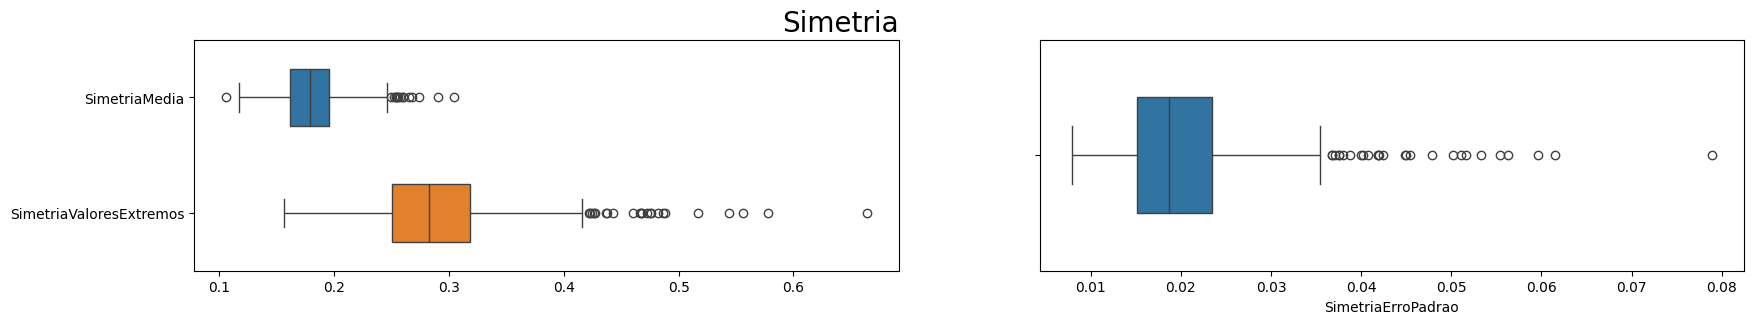

In [ ]:
simetria_df = pd.DataFrame()
simetria_df["SimetriaMedia"] = dft.symmetry1
simetria_df["SimetriaErroPadrao"] = dft.symmetry2
simetria_df["SimetriaValoresExtremos"] = dft.symmetry3
simetria_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_9 = sns.boxplot(data = [simetria_df.SimetriaMedia,simetria_df.SimetriaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_9.set_title("Simetria",fontsize = 20,loc="right")
boxplot_9 = sns.boxplot(data = simetria_df.SimetriaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_9

In [ ]:
tabela_simetria = pd.DataFrame([pedaco_descricao.symmetry1,pedaco_descricao.symmetry3,pedaco_descricao.symmetry2])
tabela_simetria_m = pd.DataFrame([descricao_m.symmetry1,descricao_m.symmetry3,descricao_m.symmetry2])
tabela_simetria_b = pd.DataFrame([descricao_b.symmetry1,descricao_b.symmetry3,descricao_b.symmetry2])

tabela_simetria.rename({"symmetry1": "SimetriaMedia","symmetry2": "SimetriaErroPadrao","symmetry3": "SimetriaValoresExtremos"},axis=0,inplace=True)
tabela_simetria_m.rename({"symmetry1": "SimetriaMedia","symmetry2": "SimetriaErroPadrao","symmetry3": "SimetriaValoresExtremos"},axis=0,inplace=True)
tabela_simetria_b.rename({"symmetry1": "SimetriaMedia","symmetry2": "SimetriaErroPadrao","symmetry3": "SimetriaValoresExtremos"},axis=0,inplace=True)

tabela_simetria

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.16190,0.17920,0.19570,0.725609,1.287933,0.16010,0.181162
SimetriaValoresExtremos,0.25040,0.28220,0.31790,1.433928,4.444560,0.22260,0.290076
SimetriaErroPadrao,0.01516,0.01873,0.02348,2.195133,7.896130,0.01344,0.020542


#### Outliers da simetria

A presença de outliers é muito elevada em todos os atributos.

#### Distribuição da simetria

A média e os valores extremos indicam simetria e o erro padrão indica uma leve assimetria à direita.

#### Dispersão da simetria

Todos os atributos apresentam uma baixa dispersão.

<Axes: xlabel='DimensaoFractalErroPadrao'>

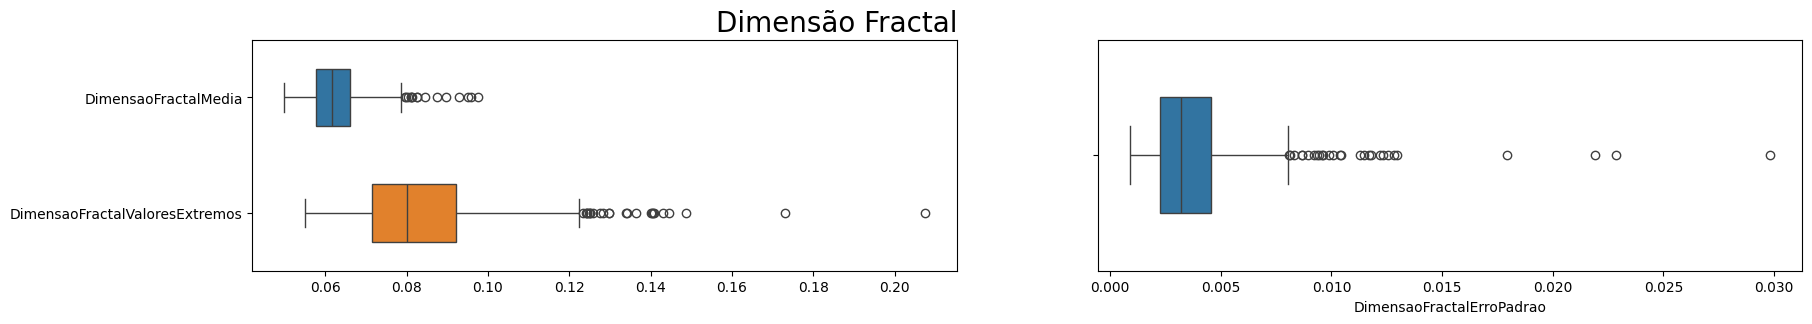

In [ ]:
dimensao_fractal_df = pd.DataFrame()
dimensao_fractal_df["DimensaoFractalMedia"] = dft.fractal_dimension1
dimensao_fractal_df["DimensaoFractalErroPadrao"] = dft.fractal_dimension2
dimensao_fractal_df["DimensaoFractalValoresExtremos"] = dft.fractal_dimension3
dimensao_fractal_df["Diagnostico"] = dft.Diagnosis

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_10 = sns.boxplot(data = [dimensao_fractal_df.DimensaoFractalMedia,dimensao_fractal_df.DimensaoFractalValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_10.set_title("Dimensão Fractal",fontsize = 20,loc="right")
boxplot_10 = sns.boxplot(data = dimensao_fractal_df.DimensaoFractalErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_10

In [ ]:
tabela_dimensao_fractal = pd.DataFrame([pedaco_descricao.fractal_dimension1,pedaco_descricao.fractal_dimension3,pedaco_descricao.fractal_dimension2])
tabela_dimensao_fractal_m = pd.DataFrame([descricao_m.fractal_dimension1,descricao_m.fractal_dimension3,descricao_m.fractal_dimension2])
tabela_dimensao_fractal_b = pd.DataFrame([descricao_b.fractal_dimension1,descricao_b.fractal_dimension3,descricao_b.fractal_dimension2])

tabela_dimensao_fractal.rename({"fractal_dimension1": "DimensaoFractalMedia","fractal_dimension2": "DimensaoFractalErroPadrao","fractal_dimension3": "DimensaoFractalValoresExtremos"},axis=0,inplace=True)
tabela_dimensao_fractal_m.rename({"fractal_dimension1": "DimensaoFractalMedia","fractal_dimension2": "DimensaoFractalErroPadrao","fractal_dimension3": "DimensaoFractalValoresExtremos"},axis=0,inplace=True)
tabela_dimensao_fractal_b.rename({"fractal_dimension1": "DimensaoFractalMedia","fractal_dimension2": "DimensaoFractalErroPadrao","fractal_dimension3": "DimensaoFractalValoresExtremos"},axis=0,inplace=True)

tabela_dimensao_fractal

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.057700,0.061540,0.066120,1.304489,3.005892,0.056670,0.062798
DimensaoFractalValoresExtremos,0.071460,0.080040,0.092080,1.662579,5.244611,0.074270,0.083946
DimensaoFractalErroPadrao,0.002248,0.003187,0.004558,3.923969,26.280847,0.001784,0.003795


#### Outliers da dimensão fractal

A presença de outliers é muito significativa.

#### Distribuição da dimensão fractal

O erro padrão e os valores extremos indicam uma leve assimetria à direita, sendo mais atenuado no erro padrão do atributo. A média indica uma simetria.

#### Dispersão da dimensão fractal

Os valores extremos apresentam muita dispersão e os demais atributos estão relativamente concentrados.

### g) Plote histogramas dos atributos (compare seu comportamento com as medidas da estatística descritiva, anteriormente calculadas) e interprete sua distribuição, considerando as classes.

#### Erro padrão

No caso do Erro padrão dos atributos as características da distribuição no geral são semelhantes às distribuições da Média e dos Valores extremos do atributo, mas dado o grau de obliquidade e curtose, geralmente observa-se no gráfico uma grande assimetria à direita e uma distribuição extremamente pontiaguda. Sendo uma distribuição semelhante para ambas as clases, ou seja, erro se aproxima de 0, mas com características mais atenuadas para a classe benigna, talvez por ser a maior parte do conjunto de dados.

<Axes: xlabel='RaioErroPadrao', ylabel='Frequência'>

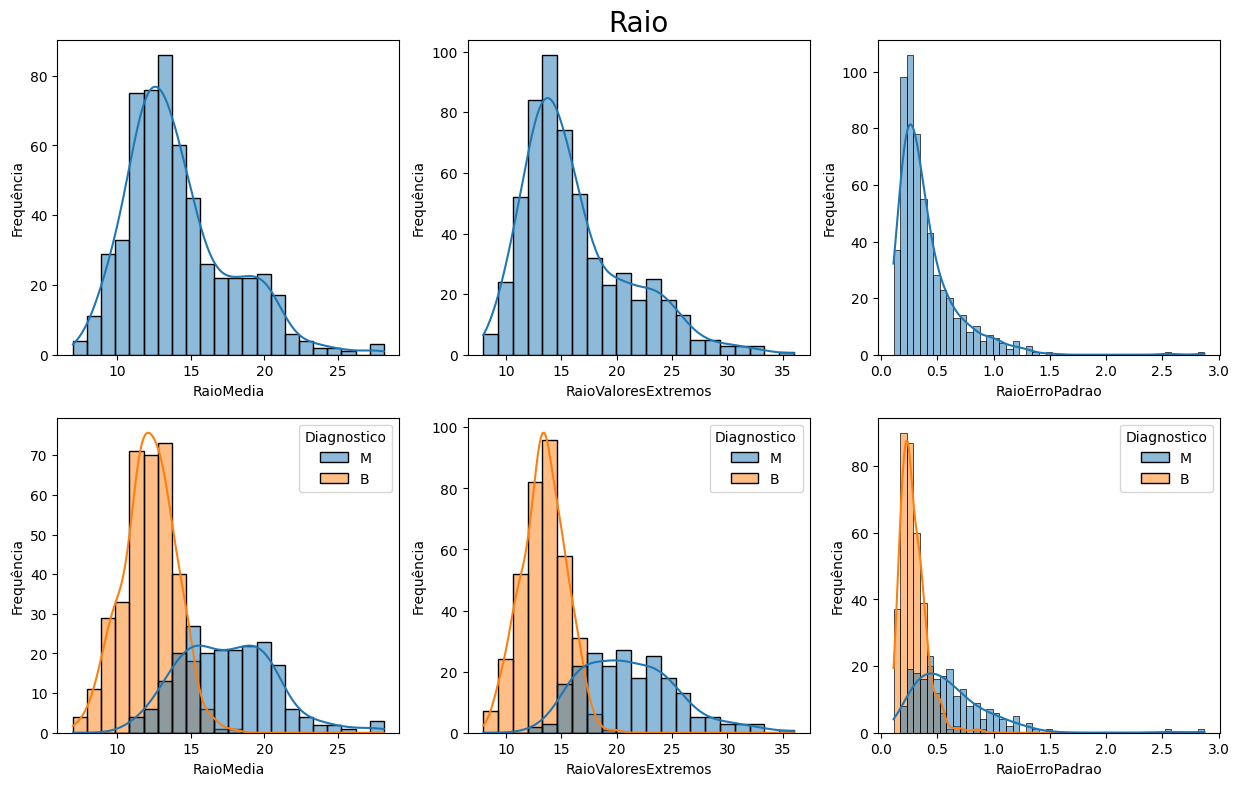

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_1 = sns.histplot(raio_df.RaioMedia,kde=True,ax=eixo[0,0])
histograma_1.set_ylabel("Frequência")
histograma_1 = sns.histplot(raio_df.RaioValoresExtremos,kde=True,ax=eixo[0,1])
histograma_1.set_ylabel("Frequência")
histograma_1.set_title("Raio",fontsize=20)
histograma_1 = sns.histplot(raio_df.RaioErroPadrao,kde=True,ax=eixo[0,2])
histograma_1.set_ylabel("Frequência")

histograma_1 = sns.histplot(raio_df,x=raio_df.RaioMedia,kde=True,ax=eixo[1,0],hue=raio_df.Diagnostico)
histograma_1.set_ylabel("Frequência")
histograma_1 = sns.histplot(raio_df,x=raio_df.RaioValoresExtremos,kde=True,ax=eixo[1,1],hue=raio_df.Diagnostico)
histograma_1.set_ylabel("Frequência")
histograma_1 = sns.histplot(raio_df,x=raio_df.RaioErroPadrao,kde=True,ax=eixo[1,2],hue=raio_df.Diagnostico)
histograma_1.set_ylabel("Frequência")

histograma_1



In [ ]:
tabela_raio

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,11.7000,13.3700,15.7800,0.942380,0.845522,12.3400,14.127292
RaioValoresExtremos,13.0100,14.9700,18.7900,1.103115,0.944090,12.3600,16.269190
RaioErroPadrao,0.2324,0.3242,0.4789,3.088612,17.686726,0.2204,0.405172


In [ ]:
tabela_raio_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,11.0800,12.2000,13.3700,-0.083799,-0.012283,12.0830,12.146524
RaioValoresExtremos,12.0800,13.3500,14.8000,-0.031586,-0.163079,12.3600,13.379801
RaioErroPadrao,0.2073,0.2575,0.3416,1.503924,4.011771,0.2204,0.284082


In [ ]:
tabela_raio_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,15.075000,17.3250,19.5900,0.501902,0.374387,15.46000,17.462830
RaioValoresExtremos,17.730000,20.5900,23.8075,0.631469,0.324494,19.85000,21.134811
RaioErroPadrao,0.390375,0.5472,0.7573,2.519402,12.106174,0.44095,0.609083


#### RaioMedia e RaioValoresExtremos


---


A distribuição é semelhante à normal, comparando a moda com a mediana e a média pode-se dizer que a distribuição é assimétrica à direita para a classe maligna e assimétrica à esquerda para a classe benigna, o que é corroborado pela obliquidade e pelo histograma, por mais que seja muito leve.
As classes formam distribuições quase independentes o que pode indicar que este é um bom atributo para separação das classes.

<Axes: xlabel='TexturaErroPadrao', ylabel='Frequência'>

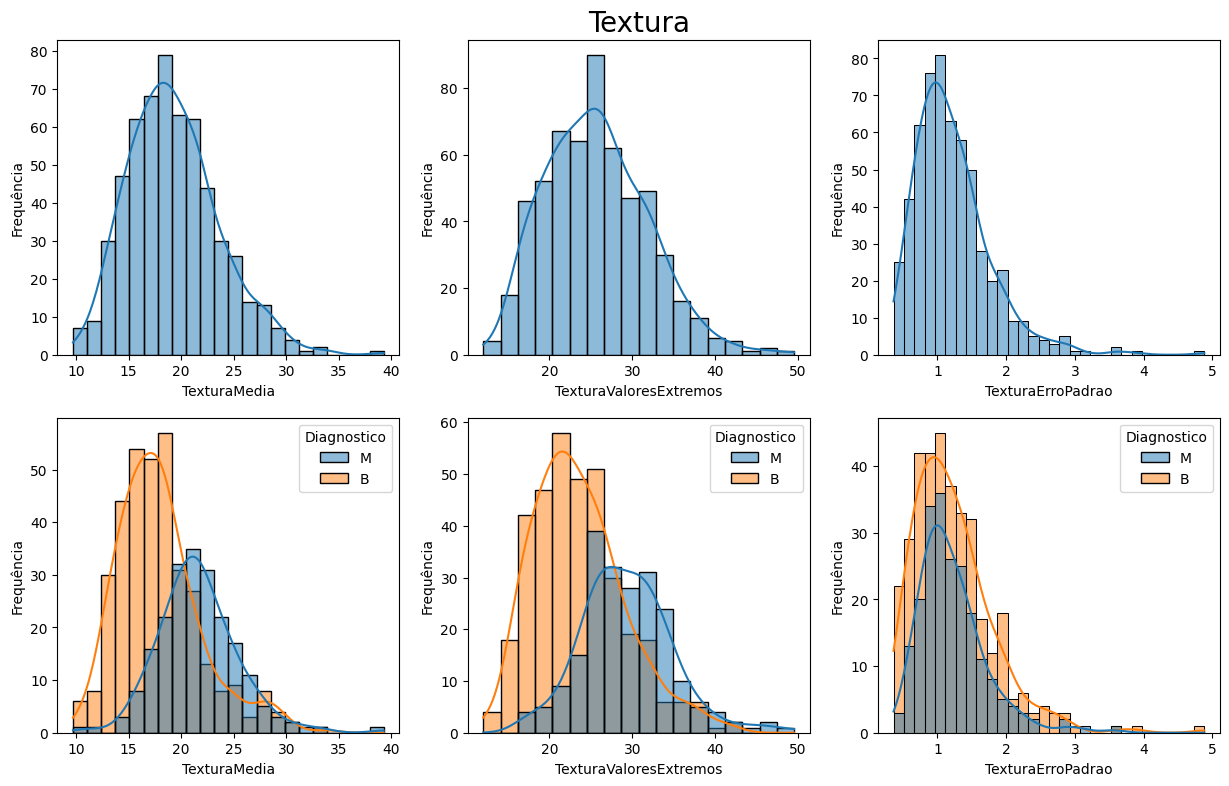

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_2 = sns.histplot(textura_df.TexturaMedia,kde=True,ax=eixo[0,0])
histograma_2.set_ylabel("Frequência")
histograma_2 = sns.histplot(textura_df.TexturaValoresExtremos,kde=True,ax=eixo[0,1])
histograma_2.set_ylabel("Frequência")
histograma_2.set_title("Textura",fontsize=20)
histograma_2 = sns.histplot(textura_df.TexturaErroPadrao,kde=True,ax=eixo[0,2])
histograma_2.set_ylabel("Frequência")

histograma_2 = sns.histplot(textura_df,x=textura_df.TexturaMedia,kde=True,ax=eixo[1,0],hue=textura_df.Diagnostico)
histograma_2.set_ylabel("Frequência")
histograma_2 = sns.histplot(textura_df,x=textura_df.TexturaValoresExtremos,kde=True,ax=eixo[1,1],hue=textura_df.Diagnostico)
histograma_2.set_ylabel("Frequência")
histograma_2 = sns.histplot(textura_df,x=textura_df.TexturaErroPadrao,kde=True,ax=eixo[1,2],hue=textura_df.Diagnostico)
histograma_2.set_ylabel("Frequência")

histograma_2

In [ ]:
tabela_textura

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,16.1700,18.840,21.800,0.650450,0.758319,14.9300,19.289649
TexturaValoresExtremos,21.0800,25.410,29.720,0.498321,0.224302,17.7000,25.677223
TexturaErroPadrao,0.8339,1.108,1.474,1.646444,5.349169,0.8561,1.216853


In [ ]:
tabela_textura_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,15.1500,17.390,19.760,0.981344,1.219651,16.663333,17.914762
TexturaValoresExtremos,19.5800,22.820,26.510,0.721816,0.447817,17.700000,23.515070
TexturaErroPadrao,0.7959,1.108,1.492,1.654504,5.442262,1.350000,1.220380


In [ ]:
tabela_textura_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,19.327500,21.4600,23.76500,0.703543,2.379109,21.183846,21.604906
TexturaValoresExtremos,25.782500,28.9450,32.69000,0.539884,1.157731,28.879167,29.318208
TexturaErroPadrao,0.892825,1.1025,1.42925,1.536328,3.877864,1.175200,1.210915


#### TexturaMedia e TexturaValoresExtremos

A distribuição é próxima da normal com uma assimetria à direita como já se esperava dado que a obliquidade > 0. Além disso, pode-se observar que o gráfico é mais pontiagudo, sendo corroborado com a curtose que é maior que 0. As classes formam distribuições em faixas de valores muito próximas o que pode indicar que este não é um atributo tão determinante para a classificação.

<Axes: xlabel='PerimetroErroPadrao', ylabel='Frequência'>

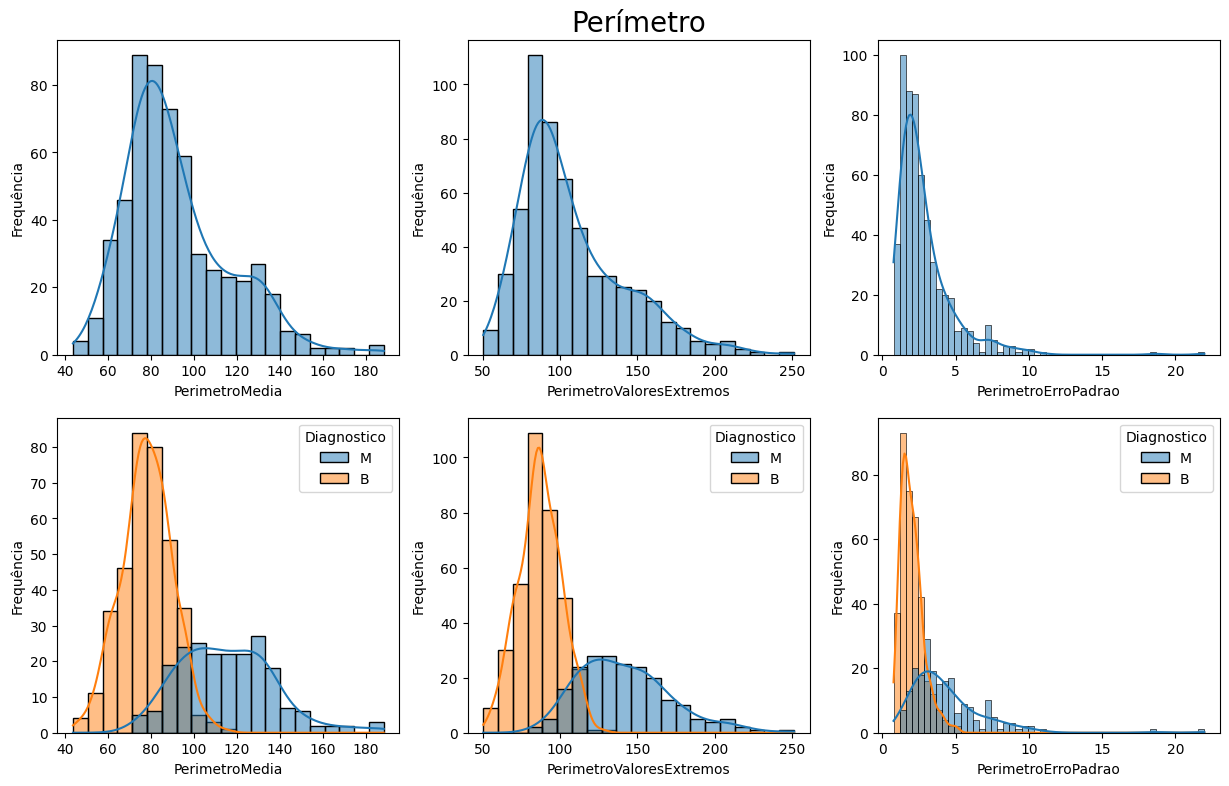

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_3 = sns.histplot(perimetro_df.PerimetroMedia,kde=True,ax=eixo[0,0])
histograma_3.set_ylabel("Frequência")
histograma_3 = sns.histplot(perimetro_df.PerimetroValoresExtremos,kde=True,ax=eixo[0,1])
histograma_3.set_ylabel("Frequência")
histograma_3.set_title("Perímetro",fontsize=20)
histograma_3 = sns.histplot(perimetro_df, x=perimetro_df.PerimetroErroPadrao,kde=True,ax=eixo[0,2])
histograma_3.set_ylabel("Frequência")

histograma_3 = sns.histplot(perimetro_df, x=perimetro_df.PerimetroMedia,kde=True,ax=eixo[1,0], hue=perimetro_df.Diagnostico)
histograma_3.set_ylabel("Frequência")
histograma_3 = sns.histplot(perimetro_df, x=perimetro_df.PerimetroValoresExtremos,kde=True,ax=eixo[1,1], hue=perimetro_df.Diagnostico)
histograma_3.set_ylabel("Frequência")
histograma_3 = sns.histplot(perimetro_df, x=perimetro_df.PerimetroErroPadrao,kde=True,ax=eixo[1,2], hue=perimetro_df.Diagnostico)
histograma_3.set_ylabel("Frequência")

histograma_3


In [ ]:
tabela_perimetro

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,75.170,86.240,104.100,0.990650,0.972214,82.610,91.969033
PerimetroValoresExtremos,84.110,97.660,125.400,1.128164,1.070150,101.700,107.261213
PerimetroErroPadrao,1.606,2.287,3.357,3.443615,21.401905,1.778,2.866059


In [ ]:
tabela_perimetro_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,70.870,78.180,86.100,-0.064684,-0.016463,82.610,78.075406
PerimetroValoresExtremos,78.270,86.920,96.590,0.008736,-0.230226,105.900,87.005938
PerimetroErroPadrao,1.445,1.851,2.388,1.187740,1.745319,1.778,2.000321


In [ ]:
tabela_perimetro_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,98.7450,114.2000,129.92500,0.604931,0.591229,134.700000,115.365377
PerimetroValoresExtremos,119.3250,138.0000,159.80000,0.748179,0.615367,117.700000,141.370330
PerimetroErroPadrao,2.7155,3.6795,5.20625,2.810137,13.929608,3.441667,4.323929


#### PerimetroMedia e PerimetroValoresExtremos

A distribuição é semelhante à normal, pode-se dizer que a distribuição é assimétrica à direita para a classe maligna e assimétrica à esquerda para a classe benigna,dada a obliquidade, por mais que seja muito leve.
As classes formam distribuições quase independentes o que pode indicar que este é um bom atributo para separação das classes.

<Axes: xlabel='AreaErroPadrao', ylabel='Frequência'>

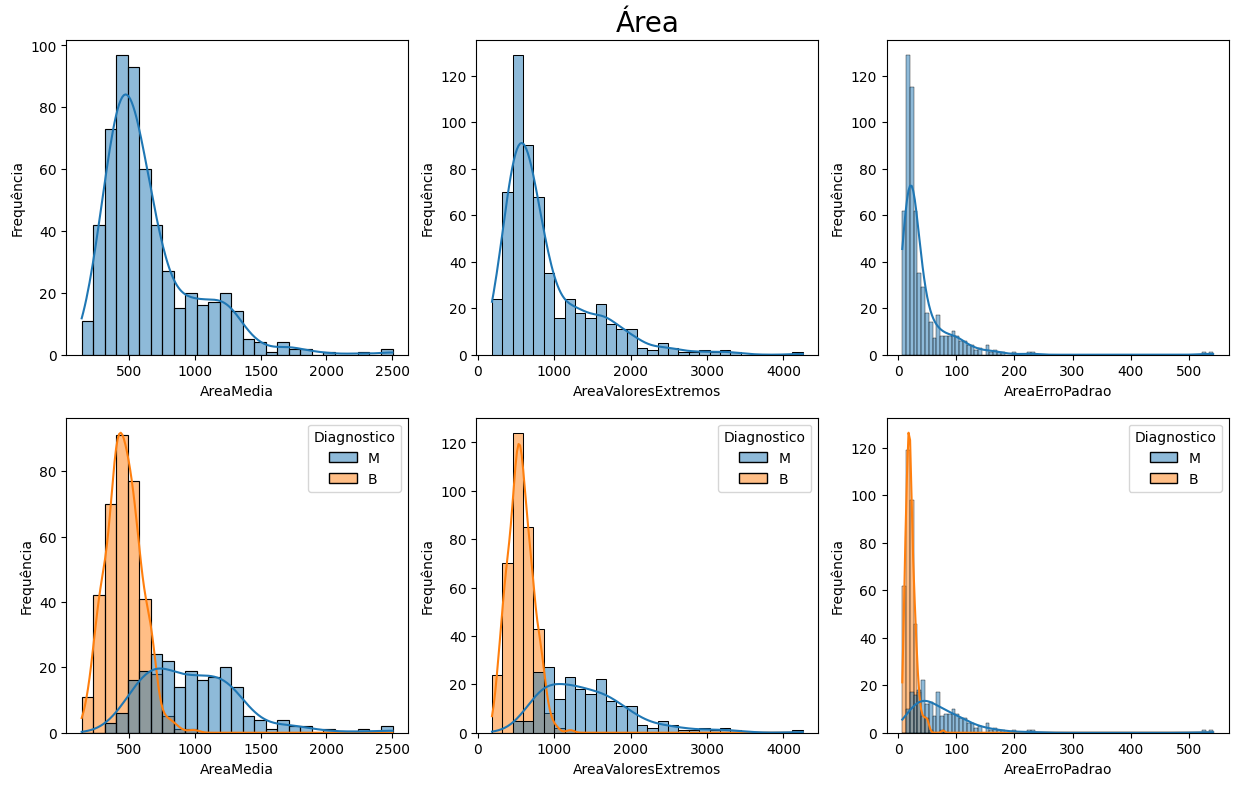

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_4 = sns.histplot(area_df.AreaMedia,kde=True,ax=eixo[0,0])
histograma_4.set_ylabel("Frequência")
histograma_4 = sns.histplot(area_df.AreaValoresExtremos,kde=True,ax=eixo[0,1])
histograma_4.set_ylabel("Frequência")
histograma_4.set_title("Área",fontsize=20)
histograma_4 = sns.histplot(area_df.AreaErroPadrao,kde=True,ax=eixo[0,2])
histograma_4.set_ylabel("Frequência")

histograma_4 = sns.histplot(area_df, x=area_df.AreaMedia,kde=True,ax=eixo[1,0], hue=area_df.Diagnostico)
histograma_4.set_ylabel("Frequência")
histograma_4 = sns.histplot(area_df, x=area_df.AreaValoresExtremos,kde=True,ax=eixo[1,1], hue=area_df.Diagnostico)
histograma_4.set_ylabel("Frequência")
histograma_4 = sns.histplot(area_df, x=area_df.AreaErroPadrao,kde=True,ax=eixo[1,2], hue=area_df.Diagnostico)
histograma_4.set_ylabel("Frequência")

histograma_4


In [ ]:
tabela_area

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,420.30,551.10,782.70,1.645732,3.652303,512.20,654.889104
AreaValoresExtremos,515.30,686.50,1084.00,1.859373,4.396395,284.40,880.583128
AreaErroPadrao,17.85,24.53,45.19,5.447186,49.209077,16.64,40.337079


In [ ]:
tabela_area_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,378.20,458.40,551.10,0.342265,0.309498,512.200000,462.790196
AreaValoresExtremos,447.10,547.40,670.00,0.367454,0.182866,572.392857,558.899440
AreaErroPadrao,15.26,19.63,25.03,1.646142,5.346992,17.155000,21.135148


In [ ]:
tabela_area_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,705.3000,932.000,1203.75,1.117668,2.306042,1034.600000,978.376415
AreaValoresExtremos,970.3000,1303.000,1712.75,1.307762,2.686803,1490.500000,1422.286321
AreaErroPadrao,35.7625,58.455,94.00,4.345029,29.045721,74.463333,72.672406


#### AreaMedia e AreaValoresExtremos

A distribuição é semelhante à normal, com uma grande assimetria à direita e com uma distribuição pontiaguda assim como era esperado dado que a obliquidade > 0 e a curtose > 0. Além disso, as classes formam distribuições quase independentes podendo indicar novamente que este é um bom atributo para separação das classes.


<Axes: xlabel='SuavidadeErroPadrao', ylabel='Frequência'>

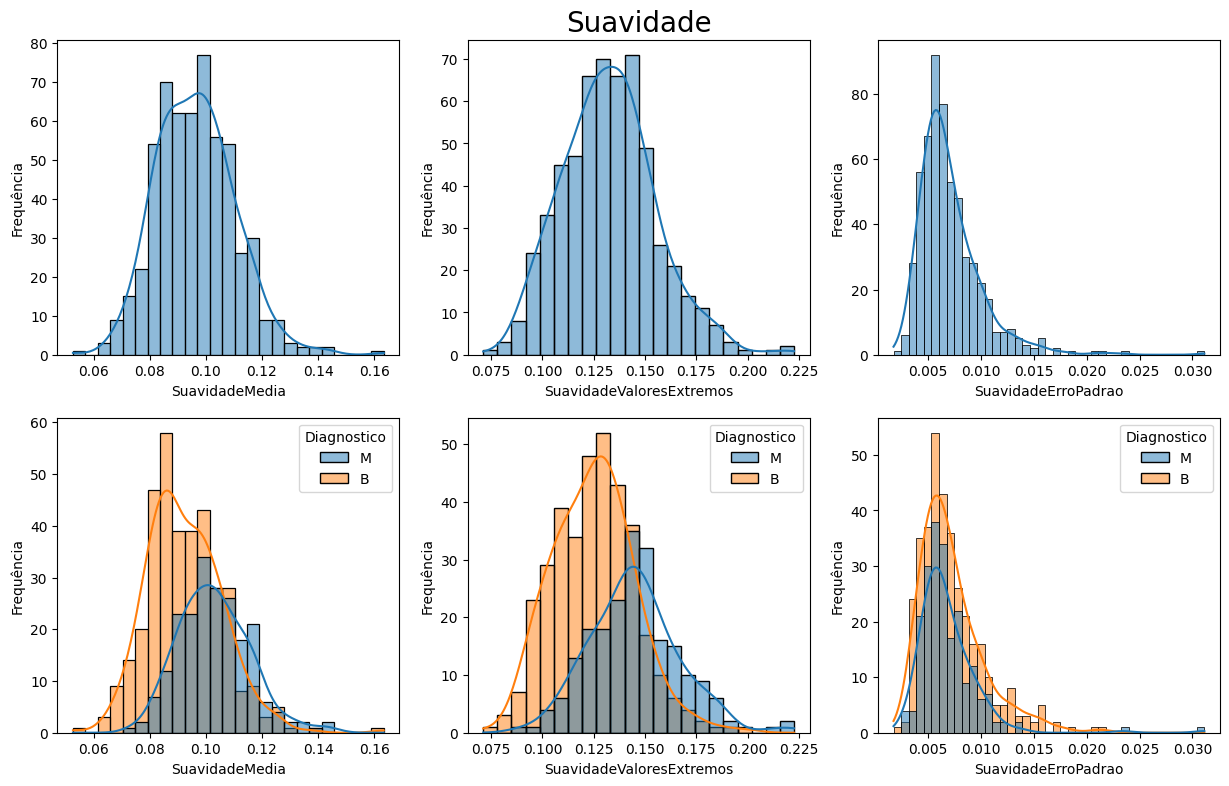

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_5 = sns.histplot(suavidade_df.SuavidadeMedia,kde=True,ax=eixo[0,0])
histograma_5.set_ylabel("Frequência")
histograma_5 = sns.histplot(suavidade_df.SuavidadeValoresExtremos,kde=True,ax=eixo[0,1])
histograma_5.set_ylabel("Frequência")
histograma_5.set_title("Suavidade",fontsize=20)
histograma_5 = sns.histplot(suavidade_df.SuavidadeErroPadrao,kde=True,ax=eixo[0,2])
histograma_5.set_ylabel("Frequência")

histograma_5 = sns.histplot(suavidade_df, x=suavidade_df.SuavidadeMedia,kde=True,ax=eixo[1,0], hue=suavidade_df.Diagnostico)
histograma_5.set_ylabel("Frequência")
histograma_5 = sns.histplot(suavidade_df, x=suavidade_df.SuavidadeValoresExtremos,kde=True,ax=eixo[1,1], hue=suavidade_df.Diagnostico)
histograma_5.set_ylabel("Frequência")
histograma_5 = sns.histplot(suavidade_df, x=suavidade_df.SuavidadeErroPadrao,kde=True,ax=eixo[1,2], hue=suavidade_df.Diagnostico)
histograma_5.set_ylabel("Frequência")

histograma_5


In [ ]:
tabela_suavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.086370,0.09587,0.105300,0.456324,0.855975,0.10070,0.096360
SuavidadeValoresExtremos,0.116600,0.13130,0.146000,0.415426,0.517825,0.12160,0.132369
SuavidadeErroPadrao,0.005169,0.00638,0.008146,2.314450,10.469840,0.00508,0.007041


In [ ]:
tabela_suavidade_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.083060,0.09076,0.100700,0.663448,1.855395,0.100586,0.092478
SuavidadeValoresExtremos,0.110400,0.12540,0.137600,0.341156,0.402556,0.123600,0.124959
SuavidadeErroPadrao,0.005212,0.00653,0.008534,1.508496,3.062153,0.006974,0.007196


In [ ]:
tabela_suavidade_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.094010,0.102200,0.110925,0.479751,0.431933,0.110200,0.102898
SuavidadeValoresExtremos,0.130475,0.143450,0.155975,0.437344,0.810338,0.140100,0.144845
SuavidadeErroPadrao,0.005085,0.006209,0.007971,3.958782,27.636711,0.006399,0.006780


#### SuavidadeMedia e SuavidadeValoresExtremos

A distribuição é próxima da normal com uma assimetria à direita dado a obliquidade > 0. O gráfico é mais pontiagudo, dado a curtose > 0. As classes formam distribuições em faixas de valores muito próximas o que pode indicar que este não é um atributo tão determinante para a classificação.


#### Observação

É importante considerar que a diferença da moda, da mediana e da média dos atributos é muito pequena, sugerindo uma maior simetria.

<Axes: xlabel='CompacidadeErroPadrao', ylabel='Frequência'>

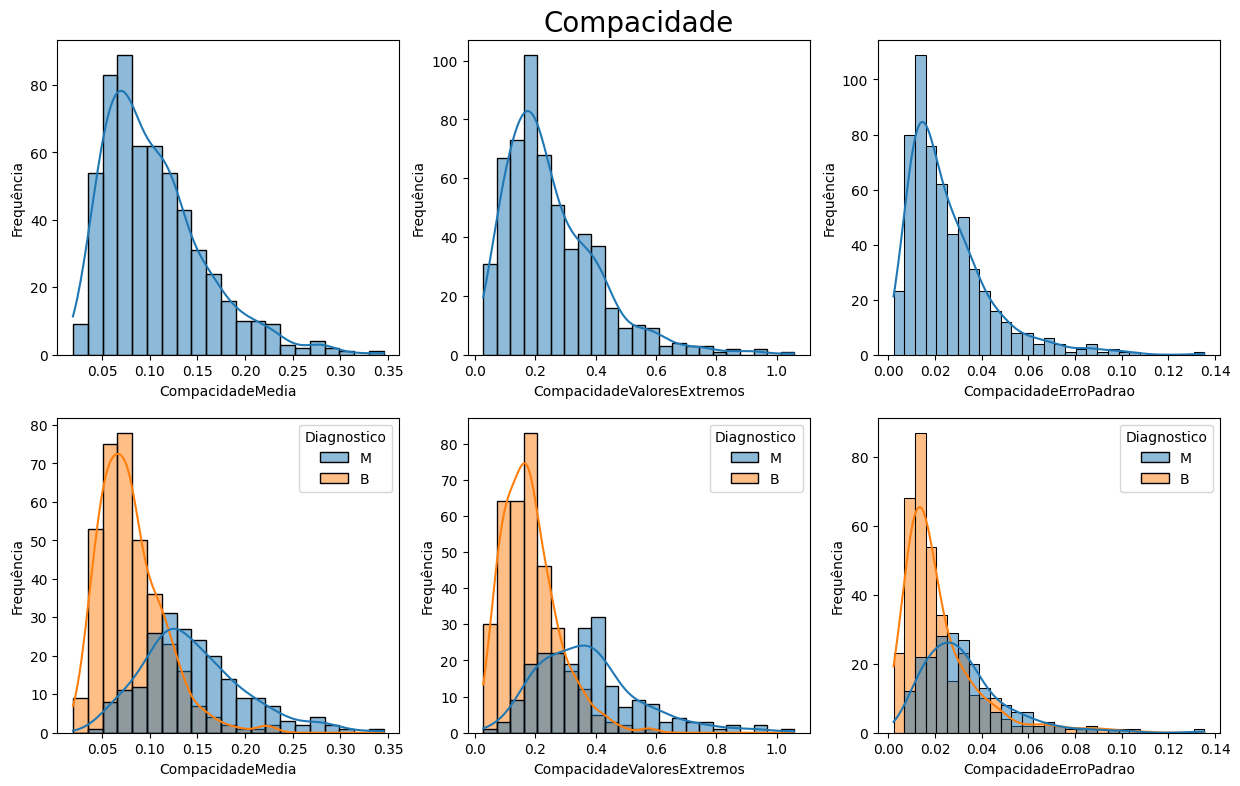

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_6 = sns.histplot(compacidade_df.CompacidadeMedia,kde=True,ax=eixo[0,0])
histograma_6.set_ylabel("Frequência")
histograma_6 = sns.histplot(compacidade_df.CompacidadeValoresExtremos,kde=True,ax=eixo[0,1])
histograma_6.set_ylabel("Frequência")
histograma_6.set_title("Compacidade",fontsize=20)
histograma_6 = sns.histplot(compacidade_df.CompacidadeErroPadrao,kde=True,ax=eixo[0,2])
histograma_6.set_ylabel("Frequência")

histograma_6 = sns.histplot(compacidade_df, x=compacidade_df.CompacidadeMedia,kde=True,ax=eixo[1,0], hue=compacidade_df.Diagnostico)
histograma_6.set_ylabel("Frequência")
histograma_6 = sns.histplot(compacidade_df, x=compacidade_df.CompacidadeValoresExtremos,kde=True,ax=eixo[1,1], hue=compacidade_df.Diagnostico)
histograma_6.set_ylabel("Frequência")
histograma_6 = sns.histplot(compacidade_df, x=compacidade_df.CompacidadeErroPadrao,kde=True,ax=eixo[1,2], hue=compacidade_df.Diagnostico)
histograma_6.set_ylabel("Frequência")

histograma_6

In [ ]:
tabela_compacidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
CompacidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
CompacidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


In [ ]:
tabela_compacidade_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.02031,0.03709,0.05999,3.473264,20.834811,0.0,0.046058
CompacidadeValoresExtremos,0.07708,0.14120,0.22160,2.553715,12.610815,0.0,0.166238
CompacidadeErroPadrao,0.01099,0.01840,0.03056,6.327025,59.045004,0.0,0.025997


In [ ]:
tabela_compacidade_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.109525,0.151350,0.203050,0.901628,1.152738,0.120400,0.160775
CompacidadeValoresExtremos,0.326425,0.404900,0.556175,0.912652,1.411274,0.408650,0.450606
CompacidadeErroPadrao,0.026998,0.037125,0.050443,1.623970,3.732019,0.032401,0.041824


#### CompacidadeMedia e CompacidadeValoresExtremos

A distribuição é semelhante à normal, com uma grande assimetria à direita e com uma distribuição pontiaguda assim como era esperado dado que a obliquidade > 0 e a curtose > 0. Sendo que a distribuição da classe benigna é muito mais pontiaguda que a da classe maligna. Além disso pode-se observar uma relativa independência das distribuições das classes.



<Axes: xlabel='ConcavidadeErroPadrao', ylabel='Frequência'>

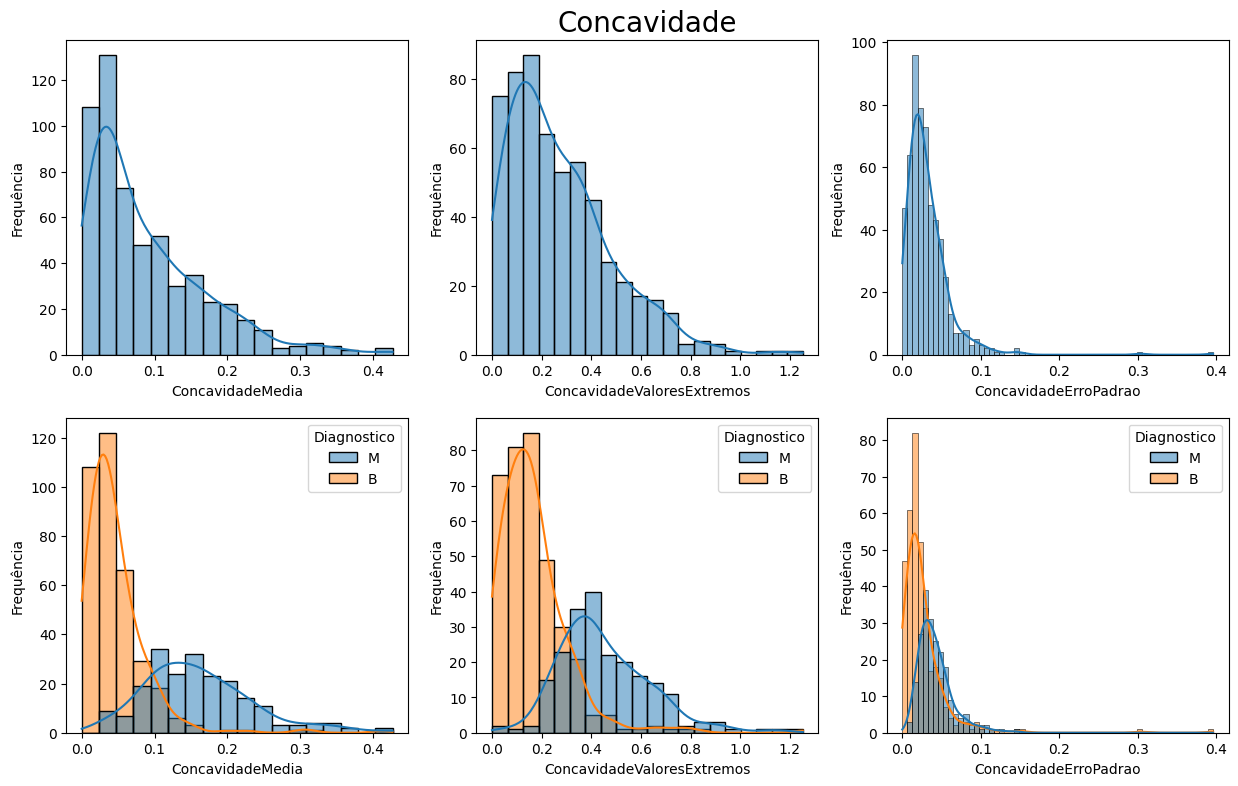

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_7 = sns.histplot(concavidade_df.ConcavidadeMedia,kde=True,ax=eixo[0,0])
histograma_7.set_ylabel("Frequência")
histograma_7 = sns.histplot(concavidade_df.ConcavidadeValoresExtremos,kde=True,ax=eixo[0,1])
histograma_7.set_ylabel("Frequência")
histograma_7.set_title("Concavidade",fontsize=20)
histograma_7 = sns.histplot(concavidade_df.ConcavidadeErroPadrao,kde=True,ax=eixo[0,2])
histograma_7.set_ylabel("Frequência")

histograma_7 = sns.histplot(concavidade_df, x=concavidade_df.ConcavidadeMedia,kde=True,ax=eixo[1,0], hue=concavidade_df.Diagnostico)
histograma_7.set_ylabel("Frequência")
histograma_7 = sns.histplot(concavidade_df, x=concavidade_df.ConcavidadeValoresExtremos,kde=True,ax=eixo[1,1], hue=concavidade_df.Diagnostico)
histograma_7.set_ylabel("Frequência")
histograma_7 = sns.histplot(concavidade_df, x=concavidade_df.ConcavidadeErroPadrao,kde=True,ax=eixo[1,2], hue=concavidade_df.Diagnostico)
histograma_7.set_ylabel("Frequência")

histograma_7

In [ ]:
tabela_concavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
ConcavidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
ConcavidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


In [ ]:
tabela_concavidade_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.02031,0.03709,0.05999,3.473264,20.834811,0.0,0.046058
ConcavidadeValoresExtremos,0.07708,0.14120,0.22160,2.553715,12.610815,0.0,0.166238
ConcavidadeErroPadrao,0.01099,0.01840,0.03056,6.327025,59.045004,0.0,0.025997


In [ ]:
tabela_concavidade_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.109525,0.151350,0.203050,0.901628,1.152738,0.120400,0.160775
ConcavidadeValoresExtremos,0.326425,0.404900,0.556175,0.912652,1.411274,0.408650,0.450606
ConcavidadeErroPadrao,0.026998,0.037125,0.050443,1.623970,3.732019,0.032401,0.041824


#### ConcavidadeMedia e ConcavidadeValoresExtremos

A distribuição é semelhante à normal no caso da classe maligna e a na classe benigna se assemelha a uma normal extremamente deformada, as duas apresentam uma assimetria á direita e uma distribuição mais pontiaguda sendo muito mais atenuado no caso da classe benigna. As classes apresentam distribuições quase independentes.


<Axes: xlabel='PontosConcavosErroPadrao', ylabel='Frequência'>

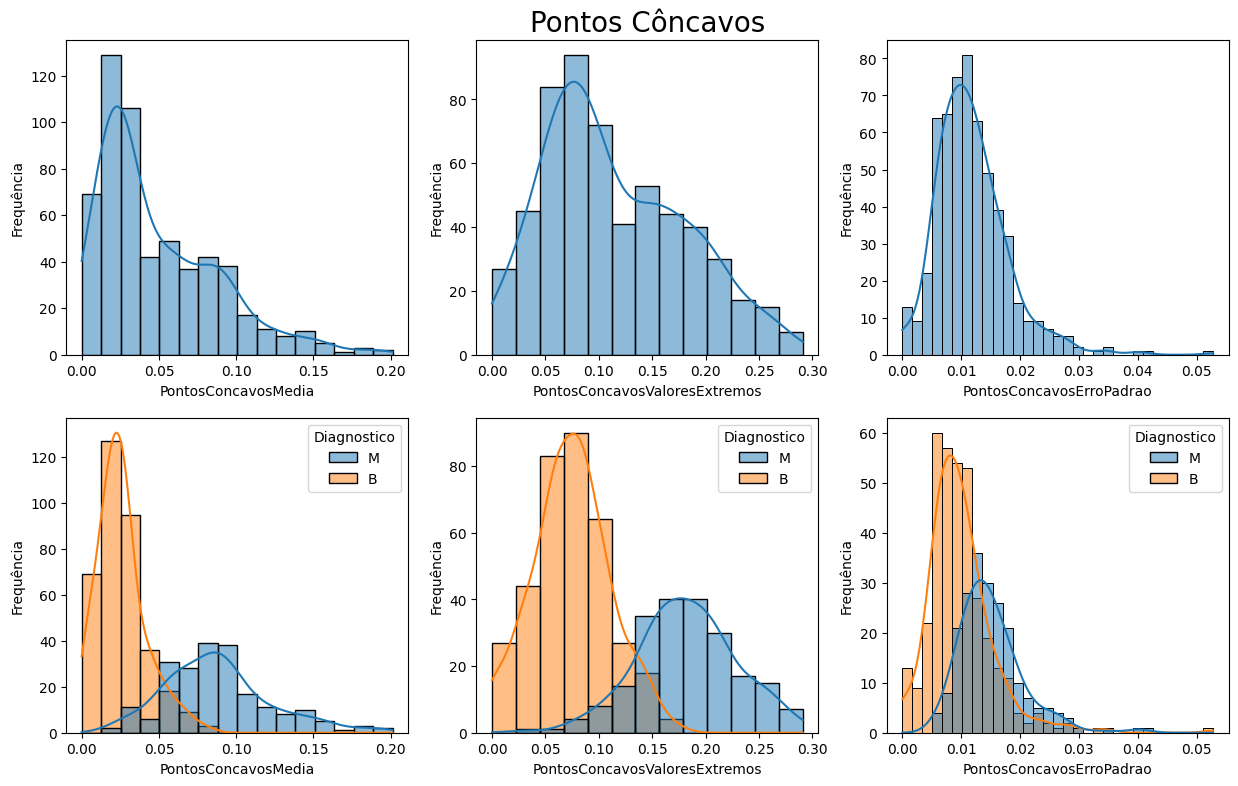

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosMedia,kde=True,ax=eixo[0,0])
histograma_8.set_ylabel("Frequência")
histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosValoresExtremos,kde=True,ax=eixo[0,1])
histograma_8.set_ylabel("Frequência")
histograma_8.set_title("Pontos Côncavos",fontsize=20)
histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosErroPadrao,kde=True,ax=eixo[0,2])
histograma_8.set_ylabel("Frequência")

histograma_8 = sns.histplot(pontos_concavos_df, x=pontos_concavos_df.PontosConcavosMedia,kde=True,ax=eixo[1,0], hue=pontos_concavos_df.Diagnostico)
histograma_8.set_ylabel("Frequência")
histograma_8 = sns.histplot(pontos_concavos_df, x=pontos_concavos_df.PontosConcavosValoresExtremos,kde=True,ax=eixo[1,1], hue=pontos_concavos_df.Diagnostico)
histograma_8.set_ylabel("Frequência")
histograma_8 = sns.histplot(pontos_concavos_df, x=pontos_concavos_df.PontosConcavosErroPadrao,kde=True,ax=eixo[1,2], hue=pontos_concavos_df.Diagnostico)
histograma_8.set_ylabel("Frequência")

histograma_8

In [ ]:
tabela_ponto_concavos

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.020310,0.03350,0.07400,1.171180,1.066556,0.0,0.048919
PontosConcavosValoresExtremos,0.064930,0.09993,0.16140,0.492616,-0.535535,0.0,0.114606
PontosConcavosErroPadrao,0.007638,0.01093,0.01471,1.444678,5.126302,0.0,0.011796


In [ ]:
tabela_ponto_concavos_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.015020,0.023440,0.03251,0.924965,1.038008,0.0,0.025717
PontosConcavosValoresExtremos,0.051040,0.074310,0.09749,0.112265,-0.164534,0.0,0.074444
PontosConcavosErroPadrao,0.006433,0.009061,0.01187,2.147109,10.641965,0.0,0.009858


In [ ]:
tabela_ponto_concavos_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.064620,0.086280,0.103175,0.739092,0.730094,0.110055,0.087990
PontosConcavosValoresExtremos,0.152750,0.182000,0.210675,-0.092809,0.135889,0.182700,0.182237
PontosConcavosErroPadrao,0.011415,0.014205,0.017497,1.437999,3.735444,0.014990,0.015060


#### PontosConcavosMedia e PontoConcavosValoresExtremos

A distribuição é semelhante à normal com assimétrica à direita e com uma distribuição mais pontiaguda dado que a obliquidade > 0 e a curtose > 0, mas com traços mais atenuados na classe benigna. No caso dos valores extremos, como uma exceção, a classe maligna apresenta uma leve assimetria à esquerda.   


<Axes: xlabel='SimetriaErroPadrao', ylabel='Frequência'>

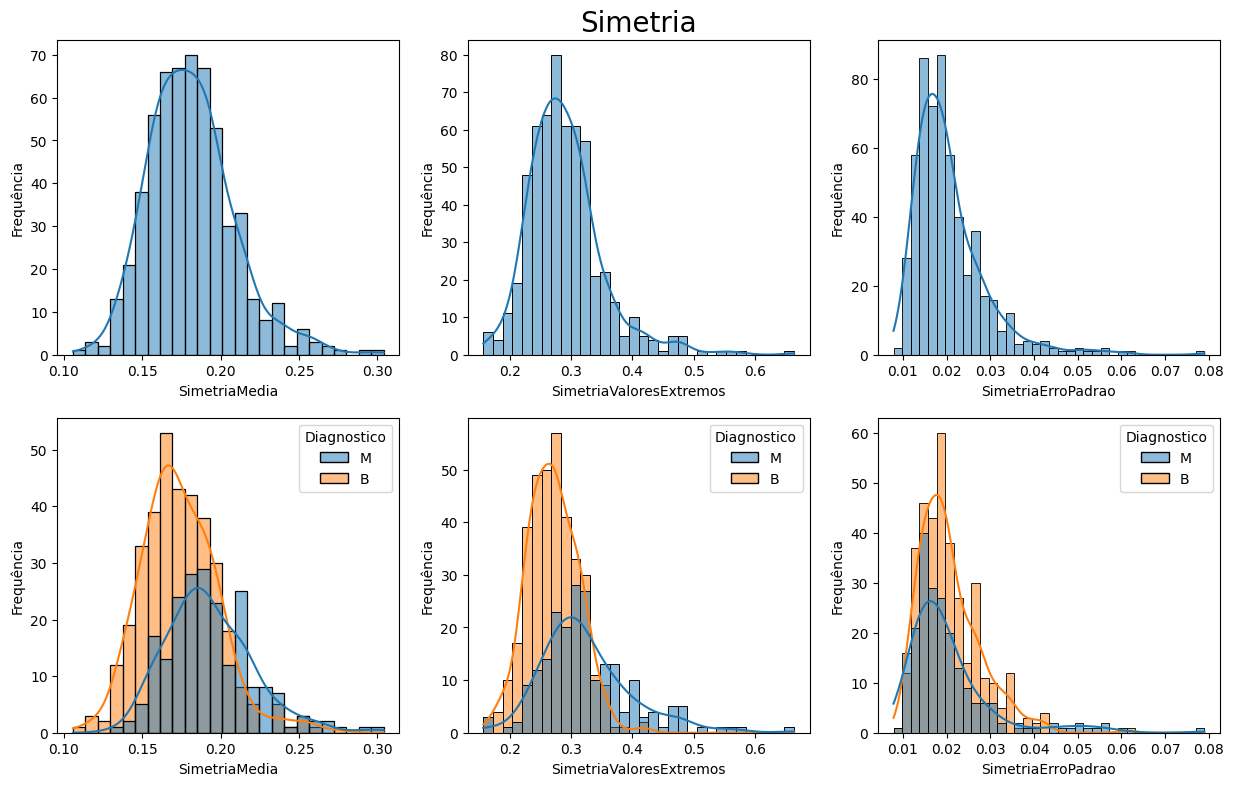

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_9 = sns.histplot(simetria_df.SimetriaMedia,kde=True,ax=eixo[0,0])
histograma_9.set_ylabel("Frequência")
histograma_9 = sns.histplot(simetria_df.SimetriaValoresExtremos,kde=True,ax=eixo[0,1])
histograma_9.set_ylabel("Frequência")
histograma_9.set_title("Simetria",fontsize=20)
histograma_9 = sns.histplot(simetria_df.SimetriaErroPadrao,kde=True,ax=eixo[0,2])
histograma_9.set_ylabel("Frequência")

histograma_9 = sns.histplot(simetria_df, x=simetria_df.SimetriaMedia,kde=True,ax=eixo[1,0], hue=simetria_df.Diagnostico)
histograma_9.set_ylabel("Frequência")
histograma_9 = sns.histplot(simetria_df, x=simetria_df.SimetriaValoresExtremos,kde=True,ax=eixo[1,1], hue=simetria_df.Diagnostico)
histograma_9.set_ylabel("Frequência")
histograma_9 = sns.histplot(simetria_df, x=simetria_df.SimetriaErroPadrao,kde=True,ax=eixo[1,2], hue=simetria_df.Diagnostico)
histograma_9.set_ylabel("Frequência")

histograma_9

In [ ]:
tabela_simetria

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.16190,0.17920,0.19570,0.725609,1.287933,0.16010,0.181162
SimetriaValoresExtremos,0.25040,0.28220,0.31790,1.433928,4.444560,0.22260,0.290076
SimetriaErroPadrao,0.01516,0.01873,0.02348,2.195133,7.896130,0.01344,0.020542


In [ ]:
tabela_simetria_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.1580,0.17140,0.18900,0.658943,1.305952,0.16575,0.174186
SimetriaValoresExtremos,0.2406,0.26870,0.29830,0.234655,0.295444,0.23045,0.270246
SimetriaErroPadrao,0.0156,0.01909,0.02406,1.377815,3.340957,0.01344,0.020584


In [ ]:
tabela_simetria_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.174050,0.1899,0.209850,0.811960,1.308901,0.192300,0.192909
SimetriaValoresExtremos,0.276500,0.3103,0.359225,1.149001,2.498544,0.319914,0.323468
SimetriaErroPadrao,0.014615,0.0177,0.022132,2.519581,8.081183,0.020450,0.020472


#### SimetriaMedia e SimetriaValoresExtremos

A distribuição é próxima da normal com uma assimetria à direita dado a obliquidade > 0. O gráfico é mais pontiagudo, dado a curtose > 0. As classes formam distribuições em faixas de valores muito próximas o que pode indicar que este não é um atributo tão determinante para a classificação.

### Observação
É importante considerar que a diferença da média, da mediana e da moda da média da simetria é muito pequena, sugerindo uma maior simetria.

<Axes: xlabel='DimensaoFractalErroPadrao', ylabel='Frequência'>

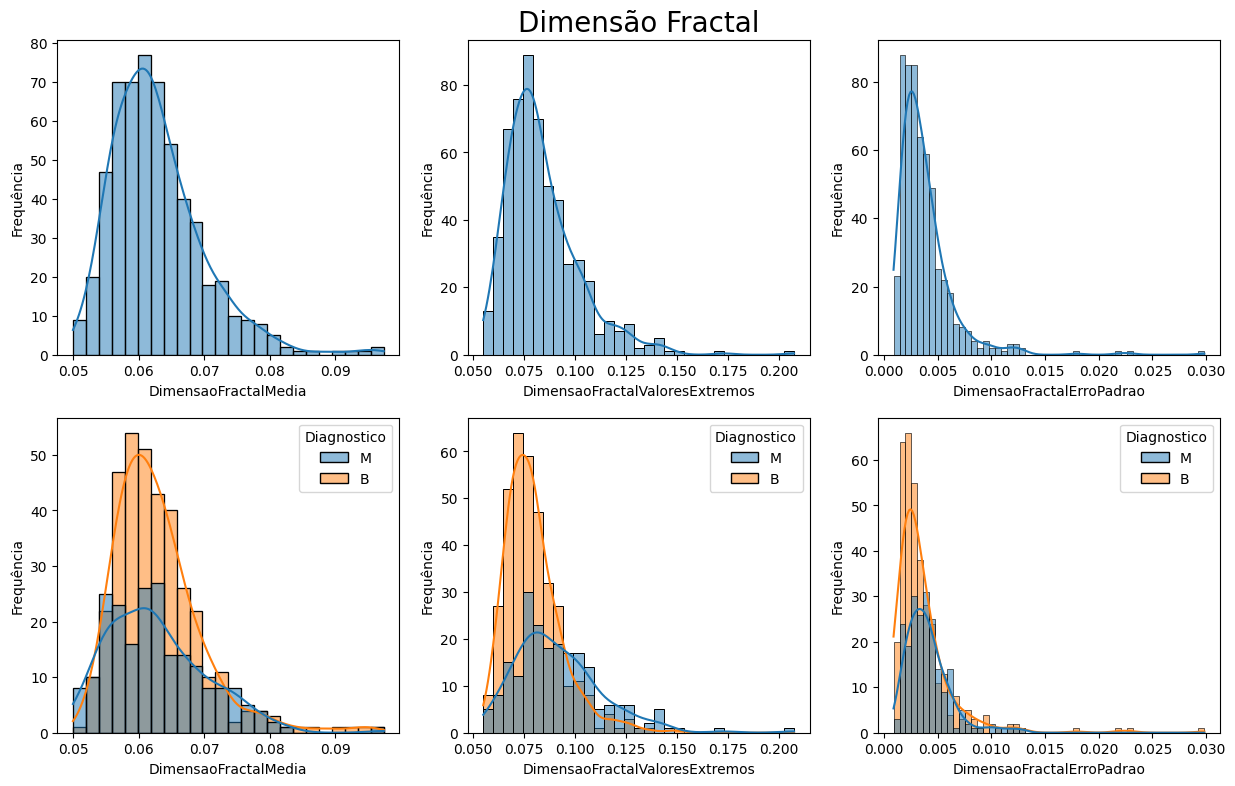

In [ ]:
imagem, eixo = plt.subplots(2,3,figsize=(15,9))

histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalMedia,kde=True,ax=eixo[0,0])
histograma_10.set_ylabel("Frequência")
histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalValoresExtremos,kde=True,ax=eixo[0,1])
histograma_10.set_ylabel("Frequência")
histograma_10.set_title("Dimensão Fractal",fontsize=20)
histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalErroPadrao,kde=True,ax=eixo[0,2])
histograma_10.set_ylabel("Frequência")

histograma_10 = sns.histplot(dimensao_fractal_df, x=dimensao_fractal_df.DimensaoFractalMedia,kde=True,ax=eixo[1,0], hue=dimensao_fractal_df.Diagnostico)
histograma_10.set_ylabel("Frequência")
histograma_10 = sns.histplot(dimensao_fractal_df, x=dimensao_fractal_df.DimensaoFractalValoresExtremos,kde=True,ax=eixo[1,1], hue=dimensao_fractal_df.Diagnostico)
histograma_10.set_ylabel("Frequência")
histograma_10 = sns.histplot(dimensao_fractal_df, x=dimensao_fractal_df.DimensaoFractalErroPadrao,kde=True,ax=eixo[1,2], hue=dimensao_fractal_df.Diagnostico)
histograma_10.set_ylabel("Frequência")

histograma_10

In [ ]:
tabela_dimensao_fractal

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.057700,0.061540,0.066120,1.304489,3.005892,0.056670,0.062798
DimensaoFractalValoresExtremos,0.071460,0.080040,0.092080,1.662579,5.244611,0.074270,0.083946
DimensaoFractalErroPadrao,0.002248,0.003187,0.004558,3.923969,26.280847,0.001784,0.003795


In [ ]:
tabela_dimensao_fractal_b

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.058530,0.061540,0.065760,1.650663,4.484522,0.059100,0.062867
DimensaoFractalValoresExtremos,0.070090,0.077120,0.085410,1.415732,3.173717,0.079504,0.079442
DimensaoFractalErroPadrao,0.002074,0.002808,0.004174,4.335433,27.749119,0.002668,0.003636


In [ ]:
tabela_dimensao_fractal_m

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.056598,0.061575,0.067075,0.894766,1.326270,0.062260,0.062680
DimensaoFractalValoresExtremos,0.076302,0.087600,0.102625,1.363200,3.951134,0.095431,0.091530
DimensaoFractalErroPadrao,0.002688,0.003739,0.004892,1.672011,3.981994,0.003376,0.004062


#### DimensaoFractalMedia e DimensaoFractalValoresExtremos

A distribuição é próxima da normal com uma assimetria à direita dado a obliquidade > 0. O gráfico é mais pontiagudo, dado a curtose > 0. As classes formam distribuições em faixas de valores muito próximas o que pode indicar que este não é um atributo tão determinante para a classificação.

### Observação
É importante considerar que a diferença da média, da mediana e da moda da média da simetria é muito pequena, sugerindo uma maior simetria.

### h) Promova uma transformação de dados consistente com o banco sob análise

Como foi possível perceber pela plotagem dos gráficos anteriores, os **atributos físicos (área, perimetro, etc.)** apresentam alta incidência de **outliers**. Assim, pode-se aplicar uma técnica de **normalização por amplitude**, a **padronização**:

In [ ]:
# Seleciona os atributos preditivos (ignorando ID e Diagnosis)
X = df

# Aplica a padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converte o resultado para DataFrame com os mesmos nomes de colunas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Exibe os primeiros valores transformados
X_scaled_df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


A padronização dos atributos preditivos foi aplicada utilizando `StandardScaler`, que transforma os dados para que tenham média zero e desvio padrão igual a um.

Essa transformação faz sentido para o conjunto de dados Breast Cancer Wisconsin Diagnostic por três motivos principais:

1. **Atributos com escalas muito diferentes** — características como `area1` e `smoothness1` têm ordens de grandeza distintas. Sem padronização, algoritmos sensíveis à escala poderiam atribuir mais importância a atributos com valores numericamente maiores, mesmo que não sejam mais relevantes.

2. **Preservação da distribuição** — a padronização mantém a forma da distribuição dos dados (incluindo outliers e assimetrias), permitindo análise posterior sem distorção estatística.

3. **Pré-requisito para técnicas como PCA** — que se baseiam em variância, a padronização garante que nenhum atributo domine artificialmente a análise de componentes principais.

Portanto, a padronização contribui para uma análise mais justa e confiável.


### i) Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos

O **PCA (Principal Components Analysis)** transforma os dados em um novo sistema de coordenadas, onde: o primeiro componente explica a maior variância possível; o segundo componente explica a maior variância restante (e assim por diante); os novos "atributos" (componentes principais) são combinações lineares dos atributos originais

In [ ]:
# Aplica PCA nos dados já padronizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Converte para DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Diagnosis"] = dt["Diagnosis"].values # Reanexa as classes

# Mostrar os "pesos" dos atributos em cada componente
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_scaled_df.columns,
    index=["PCA1", "PCA2"]
)

pca_components


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
PCA1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PCA2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


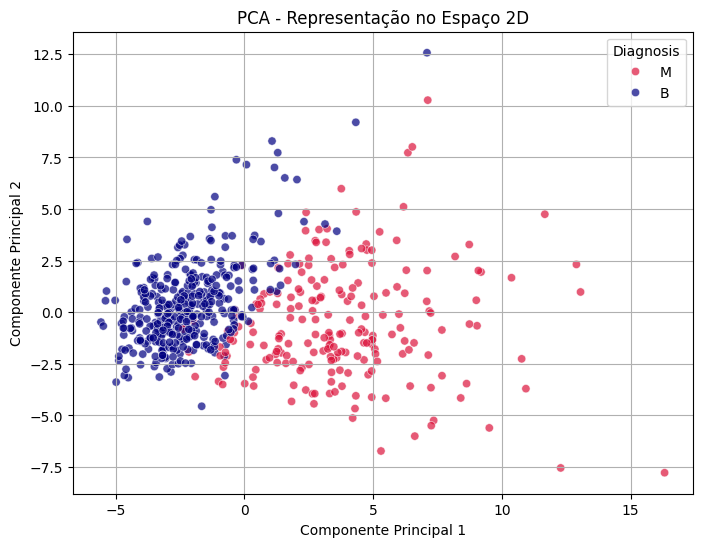

In [ ]:
# Plotagem dos dois primeiros componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Diagnosis",
    data=df_pca, palette=["crimson", "navy"], alpha=0.7
)
plt.title("PCA - Representação no Espaço 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

## Referências Bibliográficas

[1] CARLOS BUZAID, Antonio; COTAIT MALUF, Fernando. **Câncer de mama | O que é?** Disponível em: https://vencerocancer.org.br/tipos-de-cancer/cancer-de-mama-o-que-e/ Acesso em 28 de abril de 2024.

[2] STREET, W; WOLBERG, W; MANGASARIAN, O. **Nuclear feature extraction for breast tumor diagnosis.** 1993. Published in Electronic imaging. Disponível em: https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36 Acesso em 18 de abril de 2024.